# Proyecto I: Entrega 26 de Octubre 2020 - Tomás Mir Mercere

## Análisis Mercado Inmobiliario ##

**Parte 1: Pensando como un Data Science**

Dado el problema planteado por la Inmobilaria, para predecir el precio de venta de las propiedades, vamos a comenzar por identificar aquellas variables que a priori nos parecen relevantes para el análisis.

En una primera instancia cuando uno piensa tasar una propiedad, automáticamente aparece la variable de **m2**, es decir cuantos metros cuadrados tiene la propiedad y se podría diferenciar entre **m2 construidos** y **m2 de terreno**.También cuando uno quiere tasar una propiedad, complementaria a la zona, sería el **País** donde se ubica.

Otra variable que esta directamente relacionada al precio va a ser la **Zona** donde se encuentra ubicada la propiedad. En cuanto a Zona me refiero a en que Barrio esta ubicado, pero también es importante que medio de transporte tiene cerca, por lo que la **Cercanía a un medio de Transporte** sería interesante evaluar al momento de tasar una propiedad. Por otro lado, nos interesaría saber que **Servicios Agregados** tiene la propiedad, ademas de los m2, por ejemplo si tiene pileta, un edificio con gimnasio.

Luego ya profundizando en la propiedad en sí, nos interesaría saber cuantos **Ambientes** tiene, ejemplo: cuantos cuartos, cuantos baños. Por último y no por eso menos importanet, me interesaría saber el **Tipo de Propiedad**, si es departamento o una casa.

Para concluir con este análisis, algunas de las variables que analizaría para cotizar/tasar una propiedad son:

    - M2 construidos
    
    - M2 de terreno
    
    - M2 totales
    
    - País
    
    - Zona
    
    - Cercanía Medios de transporte público
    
    - Servicios Agregados "Amenities"
    
    - Cantidad de Ambientes
    
    - Tipo de Propiedad

**Parte 2: Análisis Exploratorio de Datos**

Primero para poder trabajar con un data ser, vamos a descargarnos la librería que nos permitira analizarlo.

In [71]:
import pandas as pd

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
data= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.count()
#El método count cuenta la cantidad de instancias que posee el dataset.

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

De esta manera, podemos visualizar la cantidad de columnas que hay en el data set, y la cantidad de filas que tiene que son un total de 146600. Veremos que algunas columnas tienen menos filas, eso es porque tienen valores faltantes, que luego analizaré en profundidad si eso influye en mi análisis por lo que se decidirá la posibilidad de eliminar dichas columnas.

In [4]:
data.shape
# Al ejecutar esta celda me indica la cantidad de atributos e instancias que posee el dataset.

(146660, 19)

Podemos notar que el data set consta de 19 columnas o atributos y 146660 instancias que son las filas que contienen los datos sobre cada atributo.

In [5]:
data_bd=data
data.head()
#Imprimo las 5 primeras filas para tener un primer vistazo sobre el dataset.

start_date    end_date  created_on       lat       lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.60588 -58.38495  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.62406 -58.41211  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.59357 -58.42747  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.58129 -58.43675  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.91419 -57.93822  Argentina   

                       l2             l3   rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal 7.00000   7.00000    2.00000   
1         Capital Federal          Boedo 2.00000   1.00000    2.00000   
2         Capital Federal        Palermo 2.00000   1.00000    1.00000   
3         Capital Federal        Palermo 2.00000   1.00000    1.00000   
4  Bs.As. G.B.A. Zona Sur       La Plata 2.00000   1.00000    1.00000   

   surface_total  surface_covered        price currency  \
0      140.00000        140.00000 153000.00000      USD   
1       70.00000         58.00000 159000.00000      USD   
2       45.00000         45.00000 125000.00000      USD   
3       85.00000         50.00000 295000.00000      USD   
4       50.00000         35.00000  40000.00000      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

Imprimi las 5 primeras instancias para visualizar las columnas y las filas para tener una primera impresión del data set.

In [6]:
data.describe()
#Me brinda las métricas estadísticas estandar de todos los atributos como la media, los cuartiles, el mínimo, el máximo, el desvío estandar, entre otros.

lat          lon        rooms     bedrooms    bathrooms  \
count 136735.00000 136701.00000 146660.00000 146660.00000 140703.00000   
mean     -34.60490    -58.46530      3.07982      1.98324      1.59999   
std        0.46843      0.48619      1.41635      1.15130      0.88932   
min      -35.31846   -180.00000      1.00000      0.00000      1.00000   
25%      -34.62767    -58.50401      2.00000      1.00000      1.00000   
50%      -34.60094    -58.44326      3.00000      2.00000      1.00000   
75%      -34.57460    -58.40759      4.00000      3.00000      2.00000   
max       85.05113    -57.80583     35.00000     15.00000     14.00000   

       surface_total  surface_covered          price  
count   126133.00000     125046.00000   146660.00000  
mean       216.87289        112.81801   241221.08020  
std       2037.60665        916.85758   318519.46137  
min         10.00000          1.00000     5500.00000  
25%         52.00000         47.00000   111000.00000  
50%         78.00000         68.00000   166000.00000  
75%        140.00000        108.00000   265000.00000  
max     193549.00000     126062.00000 32434232.00000

Para tener un orden de magnitud de las variables y para empezar a profundizar en ellas, me parece bueno tener un primer panorama sobre las variables principales, ya sea como media, cantidad de filas, moda, máximos, mínimos desvíos standar, percentiles.

In [7]:
data = data.rename(columns={'l2': 'Zona', 'l1': 'País','l3':'Distrito'})
#Renomobro las columnas que no tienen un significado natural, para que sea más facil para la interpretación.

Voy a analizar la cantiad de valores faltantes que tenemos en el dataset para poder tomar una decisión sobre los mismos.

In [8]:
data.isnull().sum()
#Al ejecutar esta celda puedo obtener la cantidad de valores faltantes que tengo en cada atributo.

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
País                   0
Zona                   0
Distrito               0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Es importante identificar la cantidad de datos faltantes por cada columna.

Para los datos faltantes vamos a reemplazar dichos datos de la Superficie, por la superficie promedio que tiene su mismo tipo de propiedad para poder tener un set de datos completo y correcto. **Voy a realizar una imputación de datos utilizando el promedio de cada tipo de Propiedad.**

Vamos a reagrupar los tipos de departamento para poder hacer el reemplazo correspondiente.

In [9]:
data_depto=data[data.property_type =='Departamento']

In [10]:
data_depto['surface_total'].fillna(data_depto.surface_total.mean(),inplace=True)

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
data_depto.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 7825
lon                 7837
País                   0
Zona                   0
Distrito               0
rooms                  0
bedrooms               0
bathrooms           2696
surface_total          0
surface_covered    13889
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [12]:
data_depto['surface_covered'].fillna(data_depto.surface_covered.mean(),inplace=True)

In [13]:
data_depto.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                7825
lon                7837
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms          2696
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [14]:
data_depto['bathrooms'].fillna(data_depto.bathrooms.mean(),inplace=True)

In [15]:
data_depto.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                7825
lon                7837
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [16]:
data[data.property_type =='Departamento']=data_depto

In [17]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                9925
lon                9959
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms          3261
surface_total      6950
surface_covered    7725
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

De esta manera, se puede notar como se reemplazo los valores de Superficie total, cubierta y baños del tipo de Propiedad Departamento, por el valor de su media en sus respectivas variables. Así lo hare con las demas variables hasta que sea significativo. Las variables "lat" y "lon" no me parecen variables relevantes por lo que no voy a trabajar sobre ellas.

In [18]:
data_casa=data[data.property_type =='Casa']

In [19]:
data_casa.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                1345
lon                1359
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms          1337
surface_total      4917
surface_covered    4865
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [20]:
data_casa['surface_covered'].fillna(data_casa.surface_covered.mean(),inplace=True)

In [21]:
data_casa['surface_total'].fillna(data_casa.surface_total.mean(),inplace=True)

In [22]:
data[data.property_type =='Casa']=data_casa

In [23]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                9925
lon                9959
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms          3261
surface_total      2033
surface_covered    2860
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [24]:
data_lote=data[data.property_type =='Lote']

In [25]:
data_lote.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                 125
lon                 125
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms           835
surface_total       607
surface_covered    1279
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [26]:
data_lote['surface_total'].fillna(data_lote.surface_total.mean(),inplace=True)

In [27]:
data_lote['surface_covered'].fillna(data_lote.surface_covered.mean(),inplace=True)

In [28]:
data_lote['bathrooms'].fillna(data_lote.bathrooms.mean(),inplace=True)

In [29]:
data[data.property_type =='Lote']=data_lote

In [30]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                9925
lon                9959
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms          2426
surface_total      1426
surface_covered    1581
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [31]:
data_of=data[data.property_type =='Oficina']

In [32]:
data_of.isnull().sum()

start_date           0
end_date             0
created_on           0
lat                 31
lon                 31
País                 0
Zona                 0
Distrito             0
rooms                0
bedrooms             0
bathrooms          112
surface_total      264
surface_covered    281
price                0
currency             0
title                0
description          0
property_type        0
operation_type       0
dtype: int64

In [33]:
data_of['surface_total'].fillna(data_of.surface_total.mean(),inplace=True)

In [34]:
data_of['surface_covered'].fillna(data_of.surface_covered.mean(),inplace=True)

In [35]:
data_of['bathrooms'].fillna(data_of.bathrooms.mean(),inplace=True)

In [36]:
data[data.property_type =='Oficina']=data_of

In [37]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                9925
lon                9959
País                  0
Zona                  0
Distrito              0
rooms                 0
bedrooms              0
bathrooms          2314
surface_total      1162
surface_covered    1300
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

Dado que hicimos un análisis por cada tipo de departamento para reemplazar sus datos faltantes de algunas variables relevantes por sus valores promedio, y que hayan quedado aproximadamente 1000 valores faltantes sobre 146.000 de datos que contiene el data set, voy a eliminar dichos datos faltantes.

In [38]:
data_nuevo=data.drop(['lat','lon'],axis=1)

In [39]:
data_nuevo.dropna()

start_date    end_date  created_on       País  \
0       2019-10-17  2019-12-23  2019-10-17  Argentina   
1       2019-10-17  2019-11-21  2019-10-17  Argentina   
2       2019-10-17  2019-11-01  2019-10-17  Argentina   
3       2019-10-17  2019-12-23  2019-10-17  Argentina   
4       2019-10-17  2020-03-11  2019-10-17  Argentina   
...            ...         ...         ...        ...   
146655  2019-07-31  2019-08-13  2019-07-31  Argentina   
146656  2019-07-31  2019-08-14  2019-07-31  Argentina   
146657  2019-07-31  2019-08-14  2019-07-31  Argentina   
146658  2019-07-31  2019-08-14  2019-07-31  Argentina   
146659  2019-07-31  2019-10-12  2019-07-31  Argentina   

                            Zona       Distrito   rooms  bedrooms  bathrooms  \
0                Capital Federal  San Cristobal 7.00000   7.00000    2.00000   
1                Capital Federal          Boedo 2.00000   1.00000    2.00000   
2                Capital Federal        Palermo 2.00000   1.00000    1.00000   
3                Capital Federal        Palermo 2.00000   1.00000    1.00000   
4         Bs.As. G.B.A. Zona Sur       La Plata 2.00000   1.00000    1.00000   
...                          ...            ...     ...       ...        ...   
146655    Bs.As. G.B.A. Zona Sur    Berazategui 2.00000   1.00000    1.00000   
146656  Bs.As. G.B.A. Zona Norte          Pilar 4.00000   3.00000    2.00000   
146657  Bs.As. G.B.A. Zona Norte          Pilar 1.00000   1.00000    1.00000   
146658  Bs.As. G.B.A. Zona Norte          Pilar 2.00000   1.00000    1.00000   
146659  Bs.As. G.B.A. Zona Norte          Pilar 3.00000   2.00000    1.00000   

        surface_total  surface_covered        price currency  \
0           140.00000        140.00000 153000.00000      USD   
1            70.00000         58.00000 159000.00000      USD   
2            45.00000         45.00000 125000.00000      USD   
3            85.00000         50.00000 295000.00000      USD   
4            50.00000         35.00000  40000.00000      USD   
...               ...              ...          ...      ...   
146655       54.00000         48.00000 165000.00000      USD   
146656      164.00000         90.00000 130000.00000      USD   
146657       50.00000         35.00000  73000.00000      USD   
146658       38.00000         38.00000  68000.00000      USD   
146659       75.00000         75.00000  98000.00000      USD   

                                                    title  \
0             ***Venta semipiso centro, ideal hostel*****   
1        Espectacular PH reciclado en Boedo sin expensas.   
2       Depto.tipo casa de 2 ambientes en Venta en Pal...   
3       COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4       58 entre 1 y 2  Venta de departamento en ph.1 ...   
...                                                   ...   
146655  Departamento en Venta en Barrio Privado Barran...   
146656  Venta departamentos tres dormitorios jardín co...   
146657  Venta departamento de un ambiente Manzanares C...   
146658           Departamento en Venta. Manzanares chico.   
146659          Departamento en venta en Manzanares Chico   

                                              description property_type  \
0       DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1        PH reciclado en Boedo a una cuadra de la plaz...            PH   
2       2 ambienets amplio , excelente estado , patio ...            PH   
3       HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4       58 entre 1 y 2  Venta de departamento en PH. P...            PH   
...                                                   ...           ...   
146655  Departamento de 2 ambientesCocina con alacena ...  Departamento   
146656  Muy buen duplex a estrenar en dos plantas más ...  Departamento   
146657  En los Condominios de Campo Manzanares Chico, ...  Departamento   
146658  Broker: Maria 11Departamento de dos ambientes ...  Departamento   
146659  Departamento en el Barrio M

In [40]:
data=data_nuevo.dropna()
data.isnull().sum()

start_date         0
end_date           0
created_on         0
País               0
Zona               0
Distrito           0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

Ya tengo mi data set listo para que sea trabajado.

Para hacer los gráficos para empezar a analizar cada variable por si misma vamos a utilizar la librería de **Seaborn**.

In [72]:
import seaborn as sns

Voy a analizar la variable **"Rooms"**, para analizar su distribución.

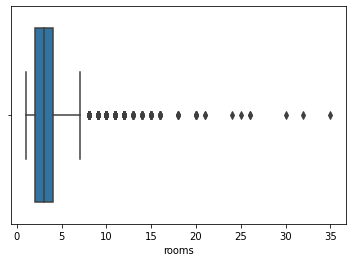

In [42]:
sns.boxplot(x=data['rooms'])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Con este tipo de gráfico a diferencia del Histograma me permite analizar que hay varios valores que son atípicos y no se comportan como los demas.

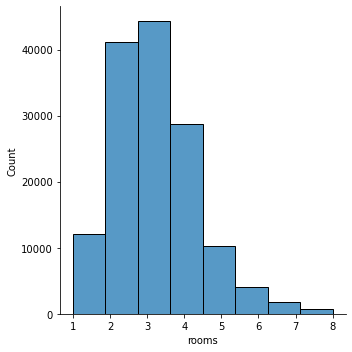

In [43]:
mascara01=data.rooms <= 8
sns.displot(data[mascara01]['rooms'],bins=8)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

De este gráfico, se puede notar la distribución de los datos. La mayoría de los mismos se encuentra en que tienen menos de 5. Esto se puede sacar del gráfico de boxplot. 

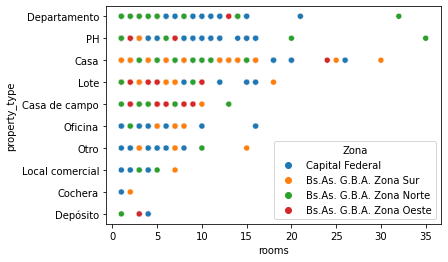

In [44]:
sns.scatterplot(data=data,x='rooms',y='property_type',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Se puede notar como gran cantidad de los Departamentos, PH y Oficinas se encuentran en Capital Federal. Por otro lado como en GBA Zona Oeste se encuentra gran cantidad de las casas de campo. Por último, se puede visualizar la gran concentración de rooms menores a 10.

Voy a analizar la variable **"Bedrooms"**, para analizar su distribución.

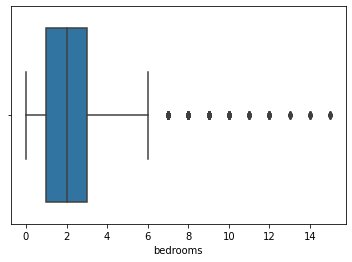

In [45]:
sns.boxplot(x=data['bedrooms'])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Se puede notar que los Outliers aparecen a partir de 6 Cuartos, es por esto que vamos a realizar un filtro para ver la distribución de la variable.

A diferencia del Boxplot de la variable "Rooms" podemos notar que se visualiza una distribución de los datos más uniforme.

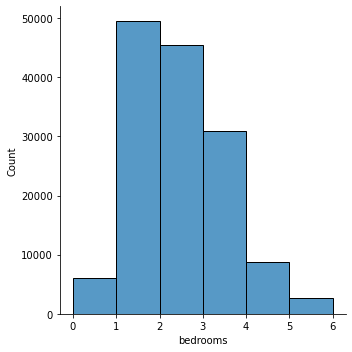

In [46]:
mascara0=data.bedrooms <=6
sns.displot(data[mascara0]['bedrooms'],bins=6)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Dada dicha distribución, se puede decir que se encuentra concentrada en que la mayoría de las propiedades tienen en promedio 3 Cuartos.

La distribución de la variable **Bathrooms** es la siguiente:

Tiene una distriución similar a la de cuartos. Vamos a analizar si contiene datos atípicos con el siguiente gráfico.

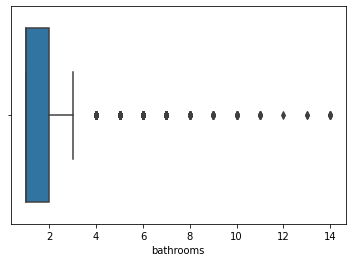

In [47]:
sns.boxplot(x=data['bathrooms'])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

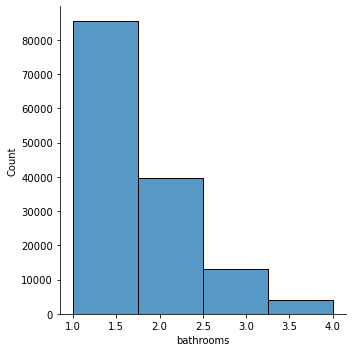

In [48]:
mascara1=data.bathrooms<=4
sns.displot(data[mascara1]['bathrooms'],bins=4)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Se puede notar como la Mediana y el 75% de los datos se encuentran menor a 2 Baños.

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


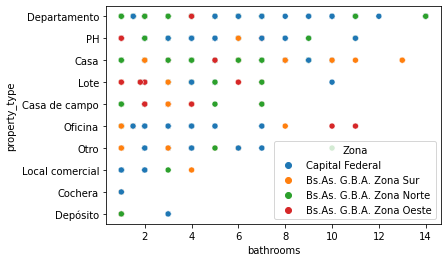

In [49]:
sns.scatterplot(data=data,x='bathrooms',y='property_type',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Al igual que con la variable bedrooms, podemos notar lo mismo con Bathrooms.

Tanto la variable como Rooms, Bedrooms y bathrooms son variables discretas, por eso se las analizó con el Gráfico de Histograma.

Las variables de **superficie**, son variables continuas por lo que eligiremos otros gráficos para analizarlas.

In [73]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize= (20,5))
mascara1=(data.surface_total <50000)&(data.surface_covered < 40000)&(data.surface_covered >30)&(data.surface_total>30)
sns.scatterplot(x='surface_total',y='surface_covered',hue='Zona',data=data[mascara1])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

NameError: name 'data' is not defined

<Figure size 1440x360 with 0 Axes>

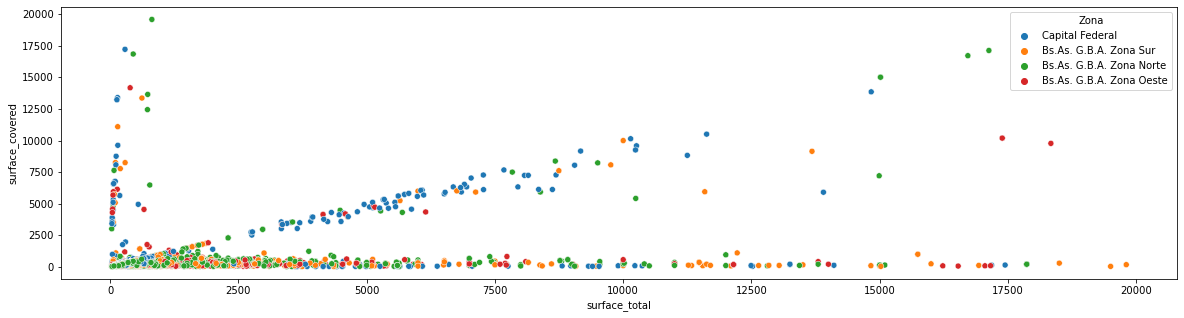

In [51]:
plt.figure(figsize= (20,5))
mascara01=(data.surface_total <20000)&(data.surface_covered < 20000)&(data.surface_covered >30)&(data.surface_total>30)
sns.scatterplot(x='surface_total',y='surface_covered',hue='Zona',data=data[mascara01])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Dado los últimos gráficos podemos visualizar como hay datos inconsistentes en donde la Superficie Total es menor a la Superficie cubierta, por lo que haremos un filtro de estos datos para poder seguir trabajando con un dataset con datos que sean coherentes.

In [52]:
mascara_data1=data.surface_total>=data.surface_covered
data[mascara_data1].count()

start_date         141712
end_date           141712
created_on         141712
País               141712
Zona               141712
Distrito           141712
rooms              141712
bedrooms           141712
bathrooms          141712
surface_total      141712
surface_covered    141712
price              141712
currency           141712
title              141712
description        141712
property_type      141712
operation_type     141712
dtype: int64

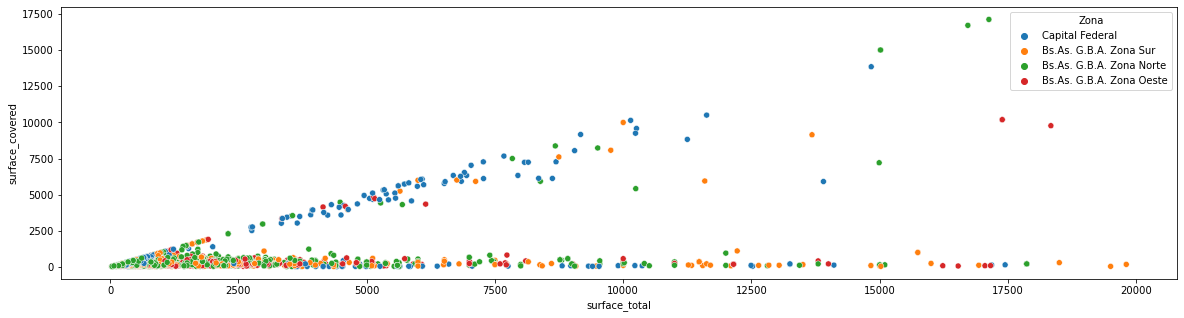

In [53]:
data1=data[mascara_data1]
plt.figure(figsize= (20,5))
mascara01=(data1.surface_total <20000)&(data1.surface_covered < 20000)&(data1.surface_covered >30)&(data1.surface_total>30)
sns.scatterplot(x='surface_total',y='surface_covered',hue='Zona',data=data1[mascara01])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Los gráficos son coherentes dado que no hay ninguna propiedad que contenga una mayor superficie cubierta que total.

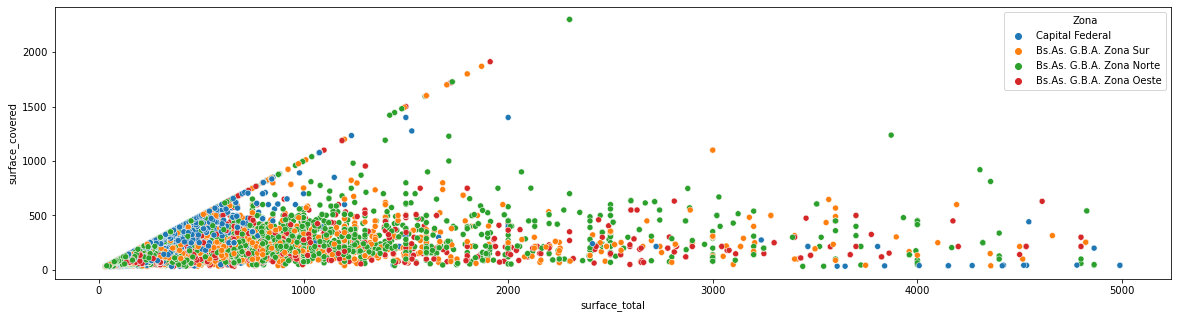

In [54]:
plt.figure(figsize= (20,5))
mascara02=(data1.surface_total <5000)&(data1.surface_covered < 2500)&(data1.surface_covered >30)&(data1.surface_total>30)
sns.scatterplot(x='surface_total',y='surface_covered',hue='Zona',data=data1[mascara02])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como la distribución de los datos nos indica que el total de las propiedades tienen mas superficie total que cubierta, pero la zona de Capital Federal al ser la mayoría de los Departamentos, se ubica cerca de la recta que se puede apreciar dado que los Departamentos suelen tener la misma cantidad de superficie  total que cubierta.

Se tiene segmentado por Zona, y se puede notar como muchas propiedades de Zona Norte tienen mucha superficie total pero poca superficie construida.

Tambíen podemos notar que hay mucho terreno que no tiene construido nada.

In [55]:
data1.describe()

rooms     bedrooms    bathrooms  surface_total  surface_covered  \
count 141712.00000 141712.00000 141712.00000   141712.00000     141712.00000   
mean       3.07466      1.98102      1.59844      216.03802        106.18395   
std        1.39062      1.12799      0.87537     1640.57575        656.50203   
min        1.00000      0.00000      1.00000       10.00000          1.00000   
25%        2.00000      1.00000      1.00000       55.00000         49.00000   
50%        3.00000      2.00000      1.00000       90.00000         75.00000   
75%        4.00000      3.00000      2.00000      140.00000        108.00000   
max       35.00000     15.00000     14.00000   169000.00000     126062.00000   

               price  
count   141712.00000  
mean    239229.64045  
std     293315.70147  
min       5500.00000  
25%     112000.00000  
50%     166000.00000  
75%     265000.00000  
max   32434232.00000

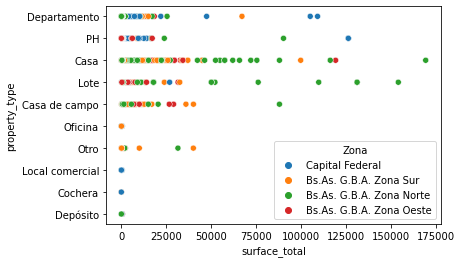

In [56]:
sns.scatterplot(data=data1,x='surface_total',y='property_type',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como las Casas tienen mas superficie total que los demás tipos de propiedades.

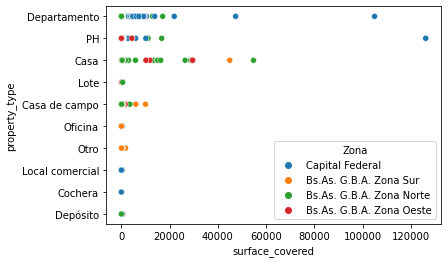

In [57]:
sns.scatterplot(data=data1,x='surface_covered',y='property_type',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar las diferencias de construcciones entre casas con departamentos y PH donde tienen generalmente menor superficie.

Veamos como se distribuyen las propiedades en las distintas Zonas.

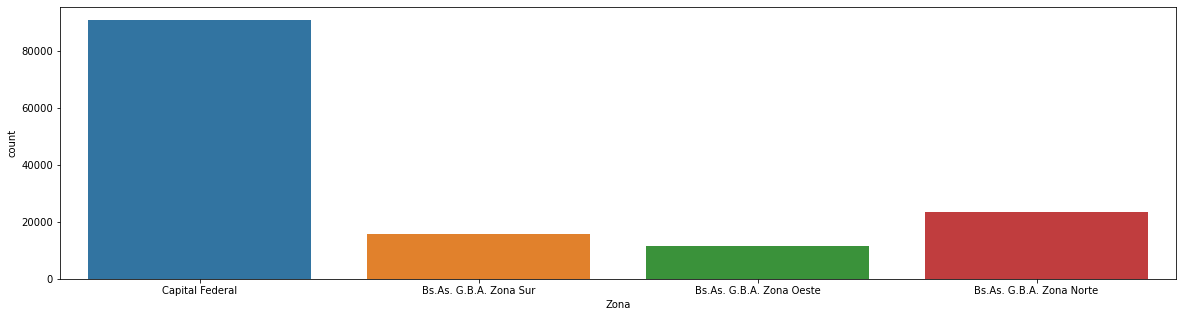

In [58]:
plt.figure(figsize= (20,5))
order=data1.sort_values('Zona', ascending=False)

sns.countplot(data=order,x='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar una gran concentración de propiedades en CABA.

Veamos los tipos de Propiedades:

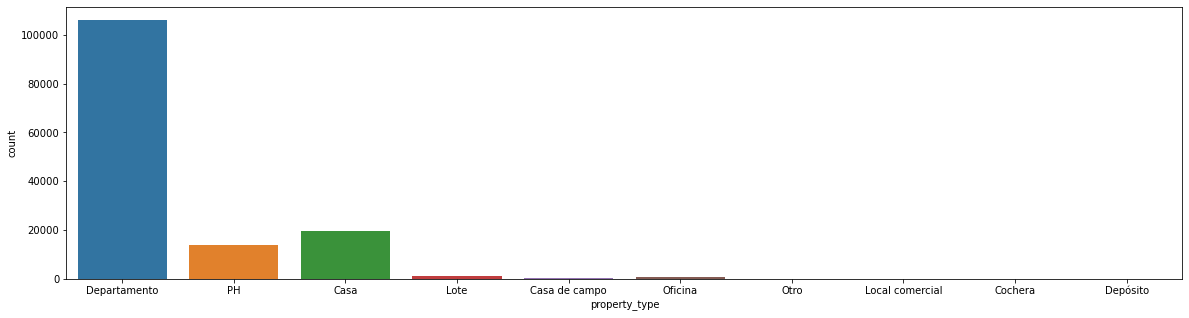

In [59]:
plt.figure(figsize= (20,5))
sns.countplot(data=data1,x='property_type')
data1.property_type.nunique()
data1['property_type'].value_counts()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Notemos los 10 diferentes tipos de propiedades, segmentado por Zona.

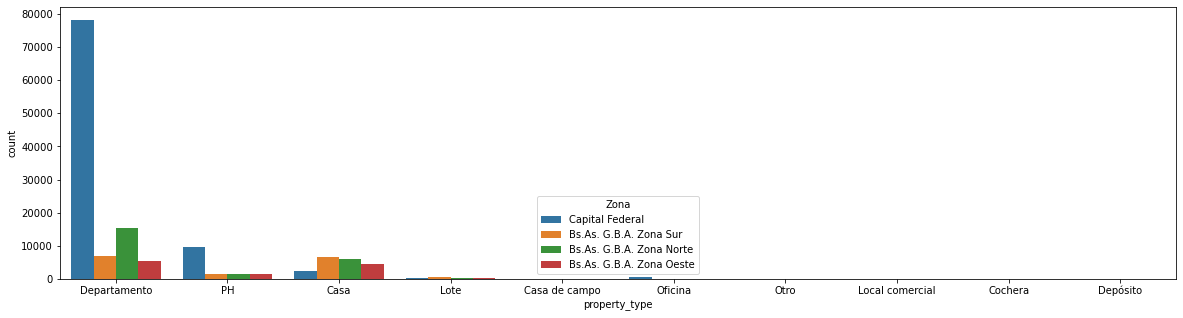

In [60]:
plt.figure(figsize= (20,5))
sns.countplot(data=data1,x='property_type',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Veamos dentro de cada Zona los distritos que se encuentran.

In [61]:
data1.Distrito.nunique()
data1['Distrito'].value_counts()

Palermo            12973
Tigre               8607
Almagro             7464
Belgrano            6805
Caballito           6550
                   ...  
Cañuelas              87
Villa Soldati         65
Villa Riachuelo       35
Marcos Paz            26
Catalinas              5
Name: Distrito, Length: 89, dtype: int64

Se encuentran 89 distritos en total en el Data Set.

24

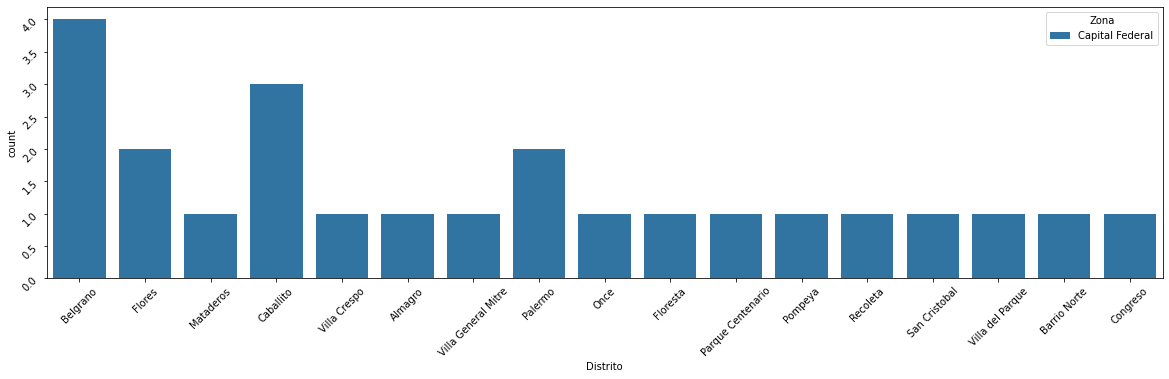

In [62]:
import numpy as np
mascara=np.logical_and(data1.Zona=='Capital Federal',data1.surface_total>10000)
plt.figure(figsize= (20,5))
sns.countplot(data=data1[mascara],x='Distrito',hue='Zona')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
data1[mascara].shape[0]

Empezamos a profundizar el análisis y podemos notar que dentro de Capital Federal, se encuentran 24 Propiedades que tienen más de 10.000 m2 como superficie total, y puedo saber en que distrito se encuentran.

In [63]:
mascara2=np.logical_and(np.logical_or(np.logical_or(data1.property_type=="Departamento",data1.property_type=="PH"),data1.property_type=="Casa"),data1.Zona=="Capital Federal")
data1[mascara2].shape

(90041, 17)

Voy a evaluar el comportamiento de algunas variables con la variable **"Precio"** para ver como se comportan.

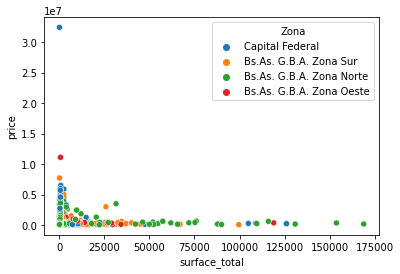

In [64]:
sns.scatterplot(data=data1,x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar que hay un **Outlier** que a muy baja superficie, tiene un precio muy alto y como Propiedades de mucha superficie tienen un precio muy bajo, es por eso que haremos un filtro para poder analizar mejor los datos.

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


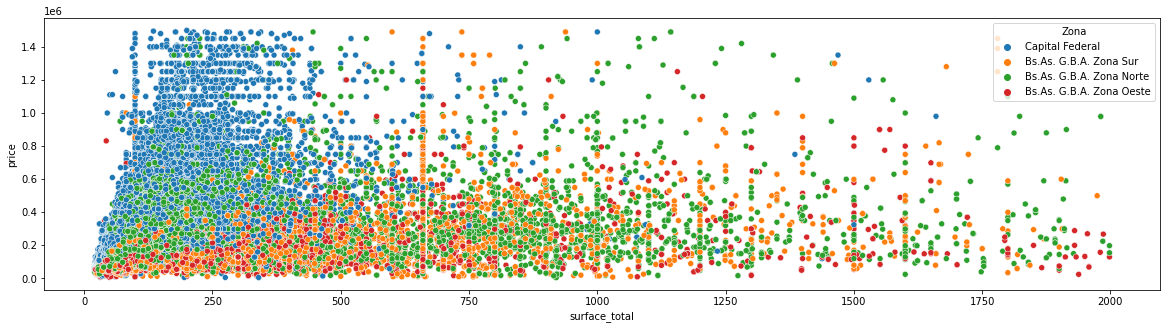

In [65]:
mascara13=(data1.price <1500000)&(data1.surface_total<2000)&(data1.surface_total>20)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data1[mascara13],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


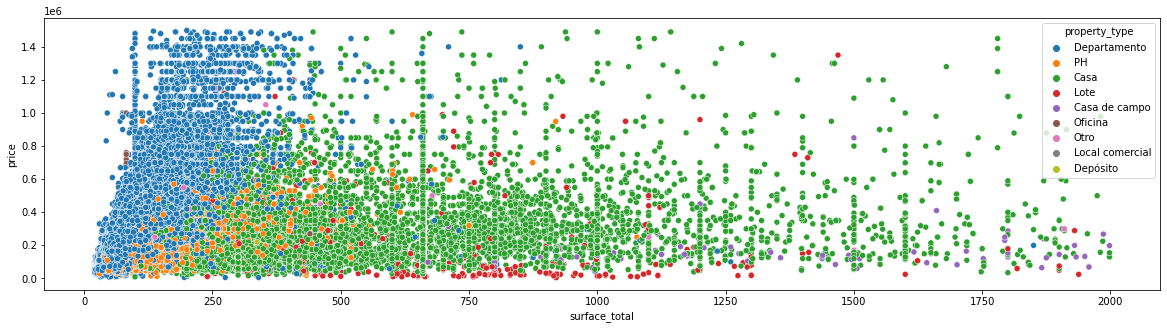

In [66]:
plt.figure(figsize= (20,5))
sns.scatterplot(data=data1[mascara13],x='surface_total',y='price',hue='property_type')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar una gran concentración de los Departamentos menores a 200 metros cuadrados.

Vamos a ver si el comportamiento de la variable "Superficie Cubierta" tiene una distribución similar a la Superficie Total.

Voy a hacer un analisis mas profundo sobre las superficies cubiertas menores a 2.500 donde se ve que esta la mayoría de los datos.

In [67]:
mascara14=(data1.price <1500000)&(data1.surface_total<125000)&(data1.surface_covered<2500)&(data1.surface_total>20)

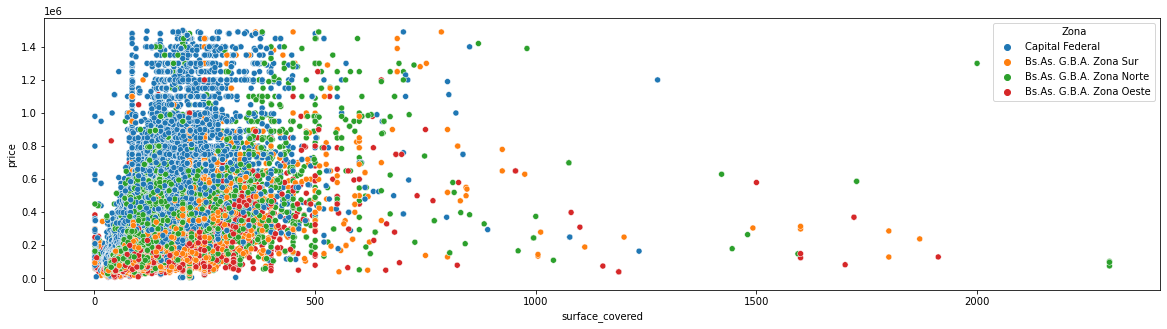

In [68]:
plt.figure(figsize= (20,5))
sns.scatterplot(data=data1[mascara14],x='surface_covered',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Se puede ver como dependiendo la Zona el precio aumenta, "Capital Federal" es de los mas caros con una misma superficie por ejemplo.

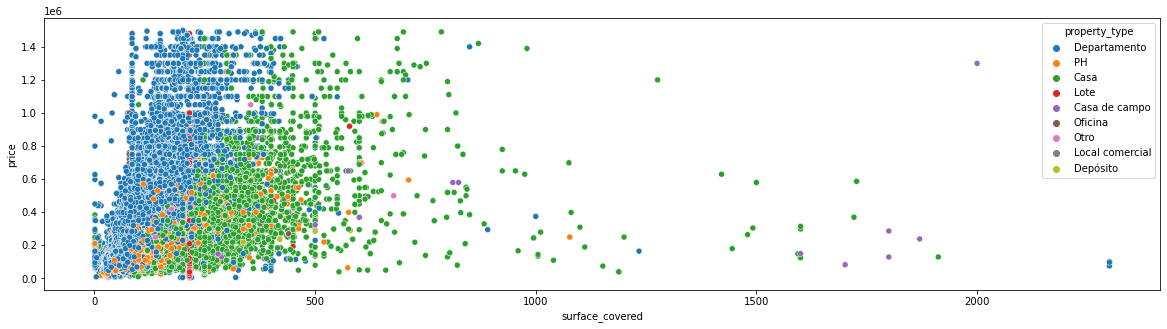

In [69]:
plt.figure(figsize= (20,5))
sns.scatterplot(data=data1[mascara14],x='surface_covered',y='price',hue='property_type')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar que las propiedades mas caras son los Departamentos en una superficie chica, y las Casas empiezan a tomar relevancia una vez que la superficie sea mayor a 200 metros cuadrados de Superficie Cubierta.

In [70]:
data1[mascara14].describe()

rooms     bedrooms    bathrooms  surface_total  surface_covered  \
count 140155.00000 140155.00000 140155.00000   140155.00000     140155.00000   
mean       3.05829      1.96951      1.57906      194.77135         94.39177   
std        1.36758      1.11813      0.84199     1141.62076         74.79561   
min        1.00000      0.00000      1.00000       21.00000          1.00000   
25%        2.00000      1.00000      1.00000       55.00000         49.00000   
50%        3.00000      2.00000      1.00000       88.00000         75.00000   
75%        4.00000      3.00000      2.00000      136.00000        105.00000   
max       35.00000     15.00000     14.00000   118984.00000       2300.00000   

              price  
count  140155.00000  
mean   221103.73715  
std    184288.54915  
min      5500.00000  
25%    112000.00000  
50%    165000.00000  
75%    260000.00000  
max   1499000.00000

Pasaré a realizar un análisis de los tipos de propiedad mas relevantes, para poder profundizar un poco mas.

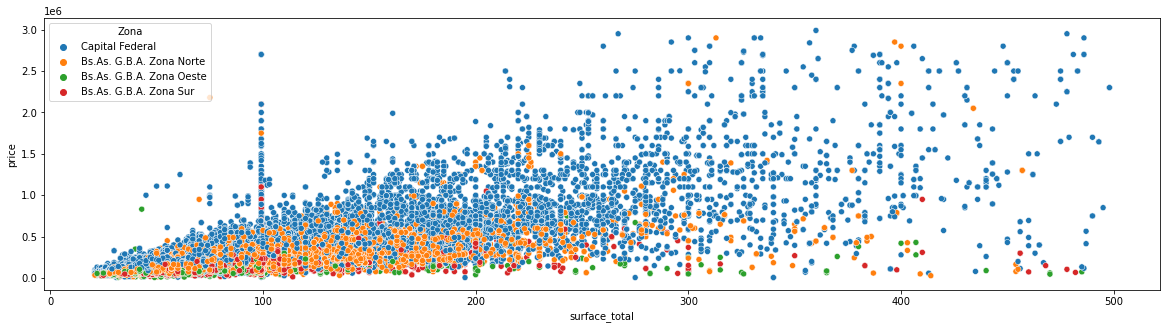

In [71]:
data_depto=data1[data1.property_type =='Departamento']
mascara15=(data_depto.surface_total < 500)&(data_depto.price <3000000)&(data_depto.surface_total>20)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_depto[mascara15],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como los precios varían entre 0 a 3 Millones de dolares y que se encuentra gran concentración menor a 200 metros cuadrados de Superficie Total.

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


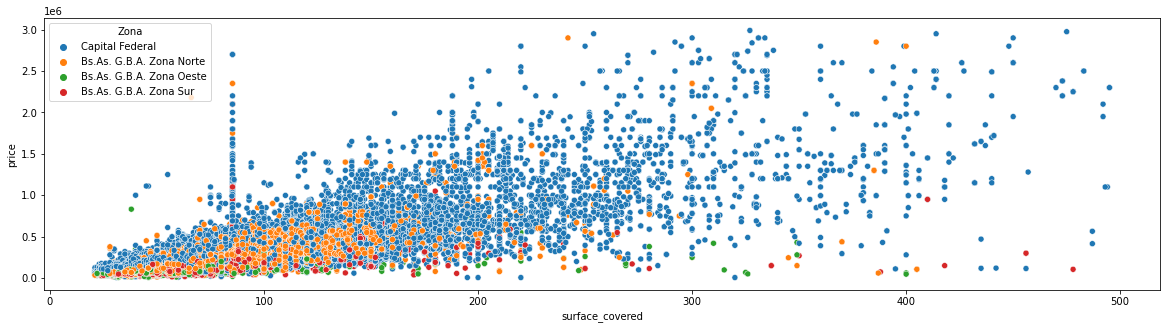

In [72]:
data_depto=data1[data1.property_type =='Departamento']
mascara16=(data_depto.surface_covered < 500)&(data_depto.price <3000000)&(data_depto.surface_covered>20)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_depto[mascara16],x='surface_covered',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

La distribución es muy similar a la de Superficie Total, esto es coherente dado que los departamenteos estan en su mayoría cubierto con metros cuadrados.

In [73]:
data_depto.Distrito.nunique()
data_depto['Distrito'].value_counts()

Palermo             11813
Tigre                7419
Almagro              6662
Belgrano             6513
Caballito            5794
                    ...  
Villa Riachuelo        11
Cañuelas               10
Catalinas               5
Marcos Paz              3
Presidente Perón        1
Name: Distrito, Length: 89, dtype: int64

Analizaremos la variable cuartos con relación al precio.

<Figure size 1440x360 with 0 Axes>

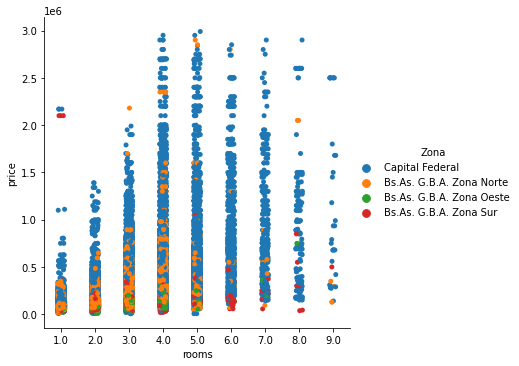

In [74]:
mascara17=(data_depto.surface_total < 500)&(data_depto.price <3000000)&(data_depto.rooms < 10)&(data_depto.surface_total>20)
plt.figure(figsize= (20,5))
sns.catplot(data=data_depto[mascara17],x='rooms',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Se puede notar como a mayor cantidad de Cuartos el Departamento es mas caro.

Con lo que respecta a la Propiedad "Casa", proseguiremos a hacer el análisis:

In [75]:
data_casa=data1[data1.property_type =='Casa']
data_casa.describe()

rooms    bedrooms   bathrooms  surface_total  surface_covered  \
count 19552.00000 19552.00000 19552.00000    19552.00000      19552.00000   
mean      4.51534     2.92144     2.12792      675.54454        219.22655   
std       1.51715     1.31191     1.11084     2761.88581        735.09118   
min       1.00000     0.00000     1.00000       11.00000          1.00000   
25%       4.00000     2.00000     1.00000      229.00000        120.00000   
50%       4.00000     3.00000     2.00000      400.00000        190.00000   
75%       5.00000     4.00000     3.00000      660.10281        249.14986   
max      26.00000    15.00000    13.00000   169000.00000      54750.00000   

               price  
count    19552.00000  
mean    273420.85270  
std     263913.14114  
min      10000.00000  
25%     130000.00000  
50%     209900.00000  
75%     330000.00000  
max   11111111.00000

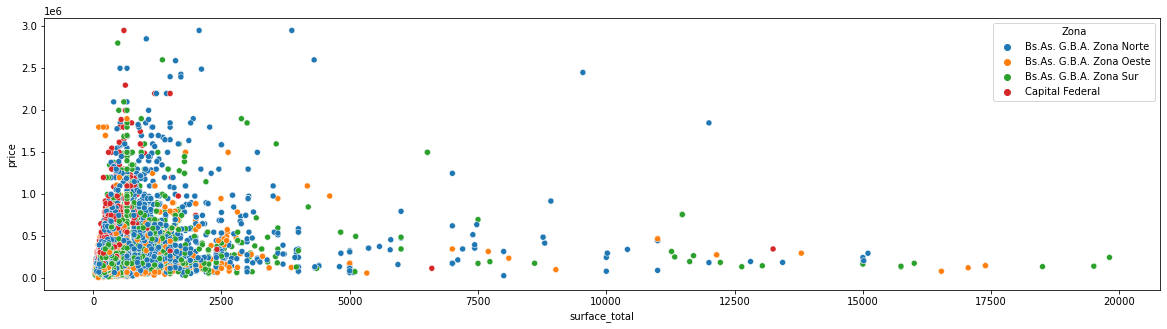

In [76]:
data_casa=data1[data1.property_type =='Casa']
mascara18=(data_casa.surface_total < 20000)&(data_casa.price <3000000)&(data_casa.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_casa[mascara18],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Profundizaremos con un filtro más directo, para analizar donde esta la concentración.

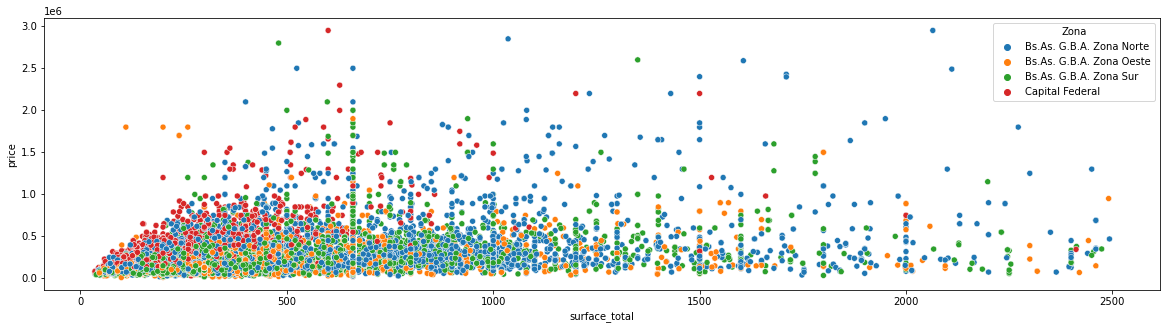

In [77]:
data_casa=data1[data1.property_type =='Casa']
mascara18=(data_casa.surface_total < 2500)&(data_casa.price <3000000)&(data_casa.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_casa[mascara18],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como la gran mayoría de las casas se encuentra en Zona Norte, Zona Oeste y no en Capital Federal, lo que tiene sentido.

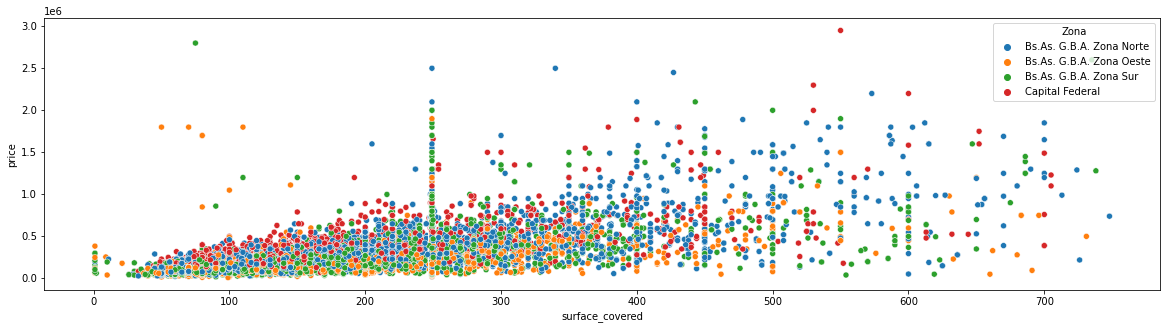

In [78]:
data_casa=data1[data1.property_type =='Casa']
mascara19=(data_casa.surface_covered < 750)&(data_casa.price <3000000)&(data_casa.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_casa[mascara19],x='surface_covered',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

La distribución es similar a la de Superficie Total, se reducen los metros cuadrados.

<Figure size 1440x360 with 0 Axes>

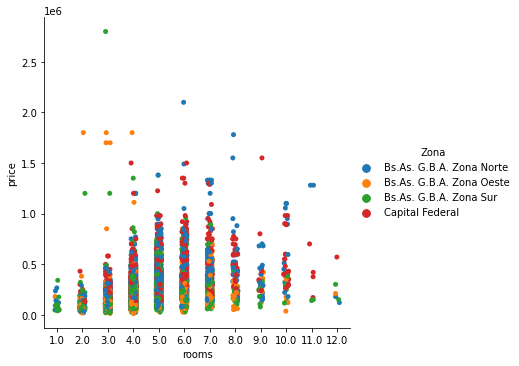

In [79]:
mascara20=(data_casa.surface_total < 500)&(data_casa.price <3000000)&(data_casa.rooms < 13)&(data_casa.surface_total>30)
plt.figure(figsize= (20,5))
sns.catplot(data=data_casa[mascara20],x='rooms',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como las casas tienen concentración en la cantidad de cuartos en 5 a 7 cuartos y podemos notar que la gracn mayoría se encuentra fuera de Capital Federal.

Voy a analizar al tercer Grupo mas relevante dentro de los tipos de relevamientos, que son los **"PH"**

In [80]:
data_ph=data1[data1.property_type =='PH']
data_ph.describe()

rooms    bedrooms   bathrooms  surface_total  surface_covered  \
count 13827.00000 13827.00000 13827.00000    13827.00000      13827.00000   
mean      3.52904     2.41759     1.48123      174.23490        117.42258   
std       1.34003     1.15708     0.74355     2051.11353       1529.88679   
min       1.00000     0.00000     1.00000       10.00000          1.00000   
25%       3.00000     2.00000     1.00000       70.00000         56.00000   
50%       3.00000     2.00000     1.00000      106.00000         80.00000   
75%       4.00000     3.00000     2.00000      151.00000        118.00000   
max      35.00000    15.00000    11.00000   126062.00000     126062.00000   

              price  
count   13827.00000  
mean   189233.28922  
std    112856.71850  
min     13000.00000  
25%    110000.00000  
50%    160000.00000  
75%    249000.00000  
max   1750000.00000

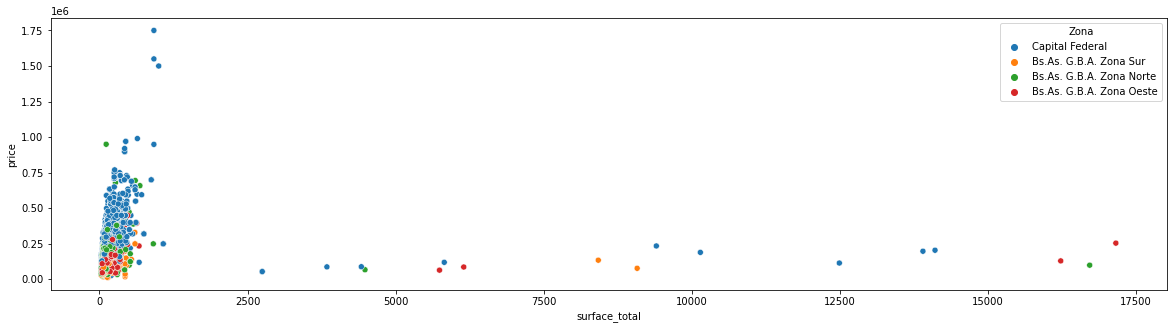

In [81]:
mascara21=(data_ph.surface_total < 20000)&(data_ph.price <3000000)&(data_ph.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_ph[mascara21],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Teniendo en cuenta la media de Superficie Total, haremos una profundización para entender la distribución de los datos.

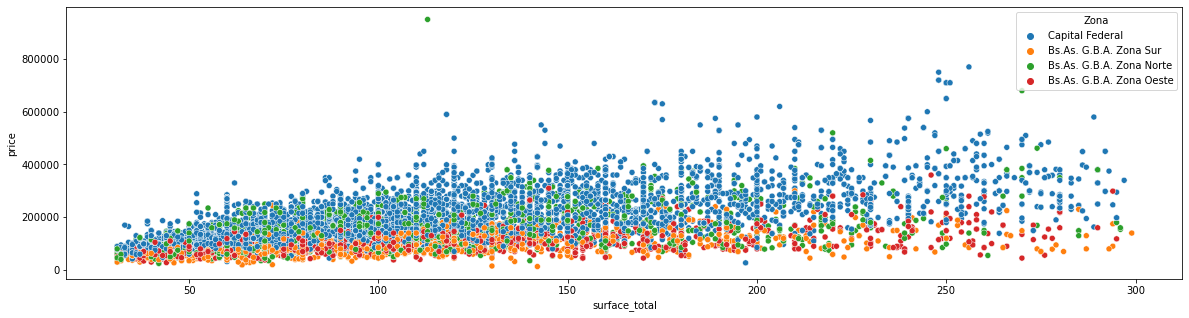

In [82]:
mascara21=(data_ph.surface_total < 300)&(data_ph.price <3000000)&(data_ph.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_ph[mascara21],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

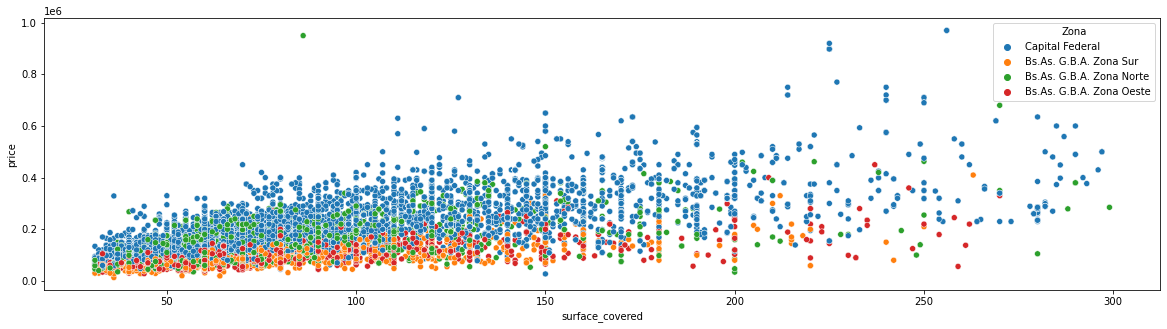

In [83]:
mascara22=(data_ph.surface_covered < 300)&(data_ph.price <3000000)&(data_ph.surface_covered>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_ph[mascara22],x='surface_covered',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar aún mas la concentración dentro de los PH en lo que es Superficie cubierta.

<Figure size 1440x360 with 0 Axes>

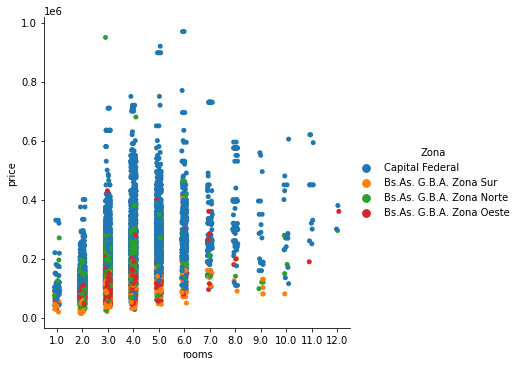

In [84]:
mascara23=(data_ph.surface_total < 500)&(data_ph.price <3000000)&(data_ph.rooms < 13)&(data_ph.surface_total>30)
plt.figure(figsize= (20,5))
sns.catplot(data=data_ph[mascara23],x='rooms',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar al igual que con Departamentos y con Casas que a mayor cantidad de Cuartos, es más caro, además de que la mayoría de los PH tienen pocos cuartos, lo cual es lógico.

In [85]:
data_lote=data1[data1.property_type =='Lote']
data_lote.describe()

rooms   bedrooms  bathrooms  surface_total  surface_covered  \
count 1231.00000 1231.00000 1231.00000     1231.00000       1231.00000   
mean     2.23802    1.23477    1.81547     2633.65940        215.00985   
std      2.16875    1.71439    0.66147     9161.93960         21.81652   
min      1.00000    0.00000    1.00000       57.00000         42.00000   
25%      1.00000    0.00000    1.81132      619.00000        215.39394   
50%      1.00000    1.00000    1.81132     2481.00284        215.39394   
75%      3.00000    2.00000    1.81132     2481.00284        215.39394   
max     18.00000   11.00000   10.00000   153800.00000        578.00000   

              price  
count    1231.00000  
mean   395056.90171  
std    727797.37048  
min      5500.00000  
25%     65000.00000  
50%    175000.00000  
75%    400000.00000  
max   5900000.00000

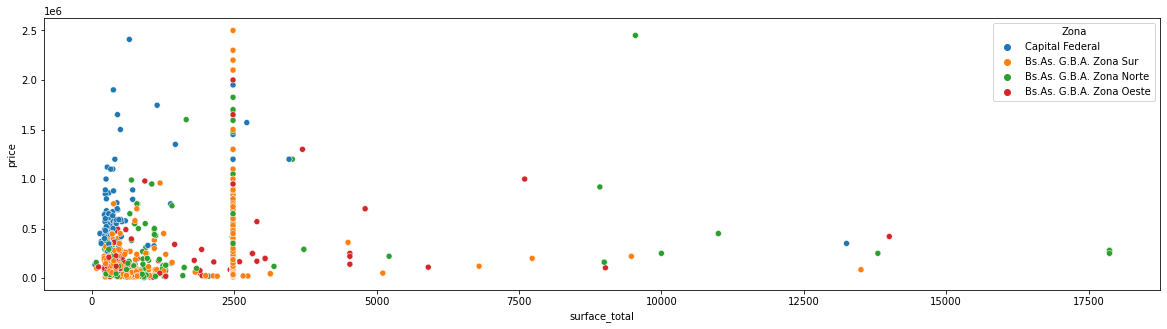

In [86]:
data_lote=data1[data1.property_type =='Lote']
mascara24=(data_lote.surface_total < 20000)&(data_lote.price <3000000)&(data_lote.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_lote[mascara24],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como la mayoría de los lotes se ubican menores a 2500 metros cuadrados. También, hay varios lotes de 2500 metros cuadrados que dependiendo la zona tienen distintos precios. Voy a profundizar aun mas para ver su realción.

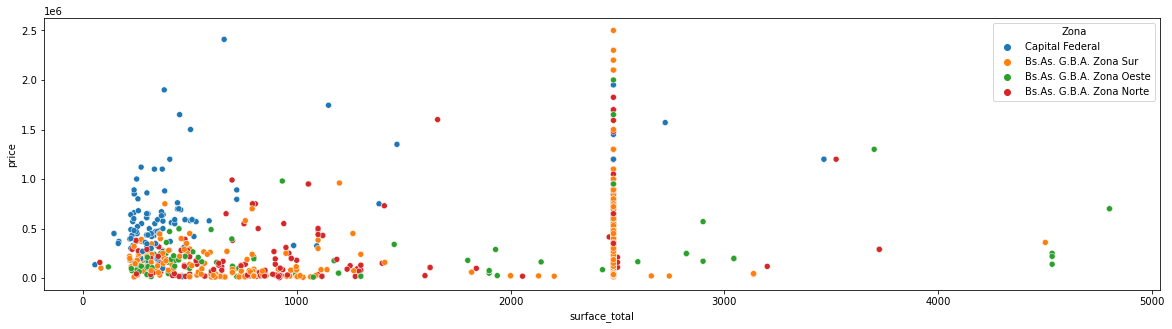

In [87]:
mascara25=(data_lote.surface_total < 5000)&(data_lote.price <3000000)&(data_lote.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_lote[mascara25],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Tal como en el gráfico anterior, notamos una concentración de los datos en los 500 metros cuadrados.

In [88]:
data_lote[data_lote.surface_total <2500].surface_total.count()

1161

In [89]:
data_lote[data_lote.surface_total >2500].surface_total.count()

67

Podemos notar como se distribuyen los datos y para que la media del Lote en superficie total sea de 2481 y estando el 75% de los casos menores a ese valor, me indica que hay muchos lotes cercanos a ese valor.

In [90]:
data_lote[data_lote.surface_total <2000].surface_total.count()

546

Para rectificar lo que pensaba, hay alrededor de 600 casos entre los 2000 y 2500 metros cuadrados.

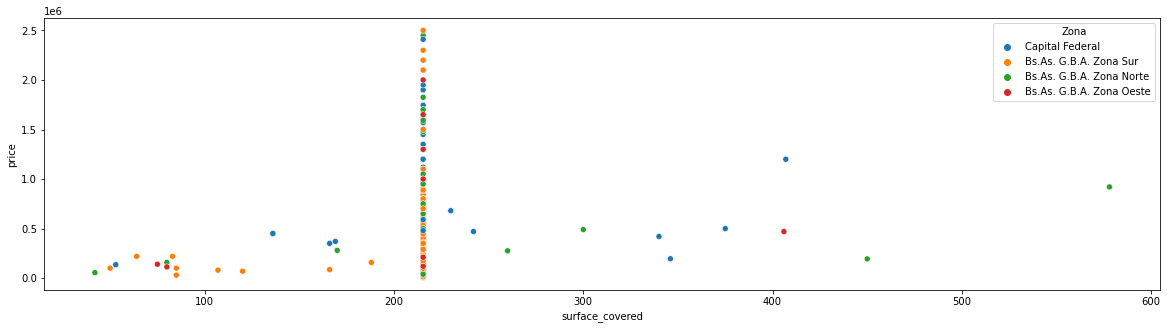

In [91]:
mascara26=(data_lote.surface_covered < 5000)&(data_lote.price <3000000)&(data_lote.surface_covered>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_lote[mascara26],x='surface_covered',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Aún mas se puede visualizar en los metros cuadrados de Superficie Cubierta que hay gran parte de dichos lotes que tienen la misma cantidad de metros cuadrados.

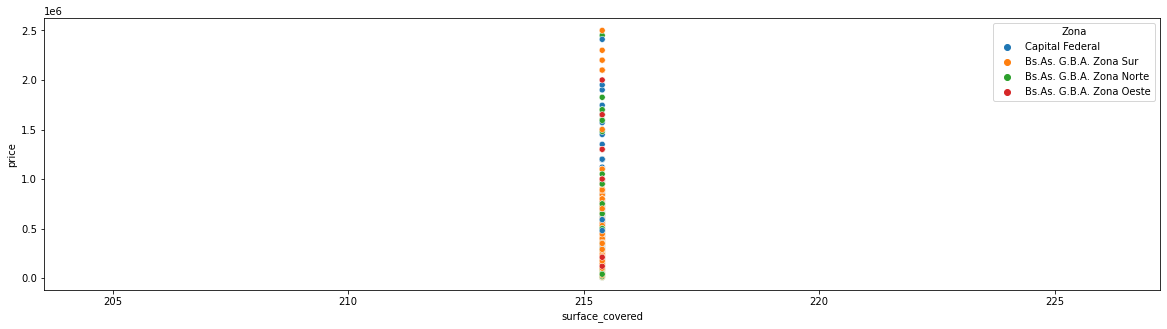

In [92]:
mascara27=(data_lote.surface_covered < 217)&(data_lote.price <3000000)&(data_lote.surface_covered>215)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_lote[mascara27],x='surface_covered',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [93]:
data_lote[(data_lote.surface_covered <216)&(data_lote.surface_covered>215)].surface_total.count()

1201

El 97% de los Lotes, tienen 215 metros cuadrados de Superficie Cubierta.

Vamos a analizar el segmento de Oficinas para ver su comportamiento.

In [94]:
data_of=data1[data1.property_type =='Oficina']
data_of.describe()

rooms  bedrooms  bathrooms  surface_total  surface_covered  \
count 639.00000 639.00000  639.00000      639.00000        639.00000   
mean    2.35681   1.39124    1.48826       81.00102         75.71007   
std     1.81971   1.61701    0.94368       48.77210         43.55682   
min     1.00000   0.00000    1.00000       15.00000         14.00000   
25%     1.00000   0.00000    1.00000       55.50000         55.00000   
50%     2.00000   1.00000    1.00000       81.95685         78.76393   
75%     3.00000   2.00000    1.75000       81.95685         78.76393   
max    16.00000  14.00000   11.00000      453.00000        440.00000   

              price  
count     639.00000  
mean   183417.63537  
std    171525.26052  
min     25000.00000  
25%     89000.00000  
50%    155000.00000  
75%    225000.00000  
max   2500000.00000

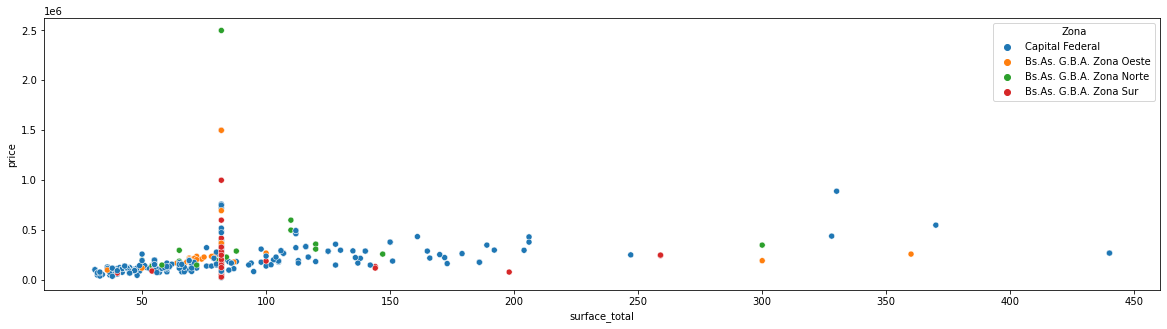

In [95]:
mascara28=(data_of.surface_total <453)&(data_of.price <3000000)&(data_of.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_of[mascara28],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Vamos a profundizar aún mas para ver como se comporta en donde se encuentra la mayor concentración de datos.

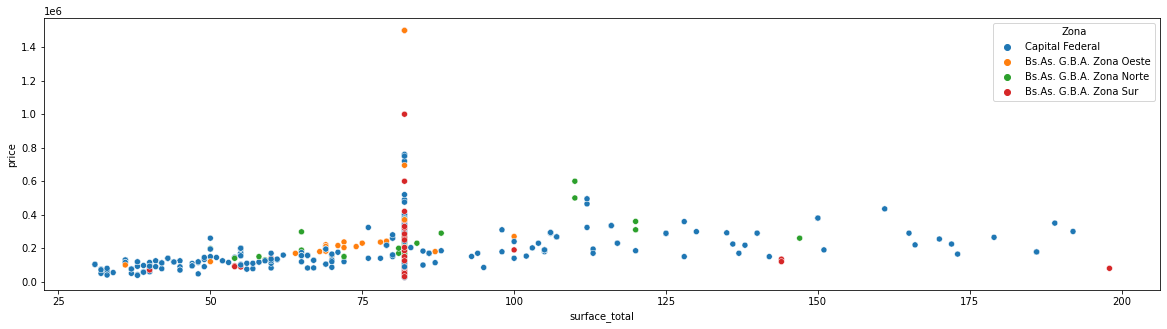

In [96]:
mascara28=(data_of.surface_total <200)&(data_of.price <2000000)&(data_of.surface_total>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_of[mascara28],x='surface_total',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Al igual que en los Lotes vemos gran cantidad de Oficinas con una misma superficie total y su precio varía según la zona donde se encuentre.

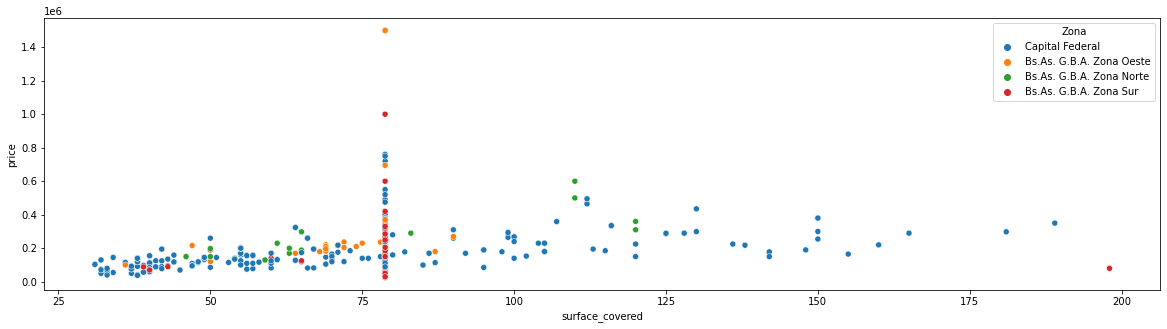

In [97]:
mascara29=(data_of.surface_covered <200)&(data_of.price <2000000)&(data_of.surface_covered>30)
plt.figure(figsize= (20,5))
sns.scatterplot(data=data_of[mascara29],x='surface_covered',y='price',hue='Zona')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [98]:
data_of[(data_of.surface_covered <80)&(data_of.surface_covered>77)].surface_covered.count()

271

No así como en los Lotes pero el 43% de las Oficinas tiene un mismo valor de superficie y varía su precio según la Zona en la que se encuentre ubicado.

Analicemos la variable **Precio** con mayor profundidad.

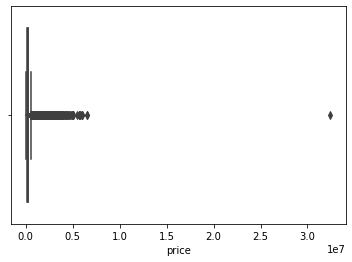

In [99]:
sns.boxplot(x=data1[mascara2]['price'])
data1[mascara2].shape
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar, como la varibale precio se encuentra distribuida entre muchos valores, dado que tiene una cola larga,es por tal motivo que haré un filtro para poder visualizarla mejor.

(90024, 17)

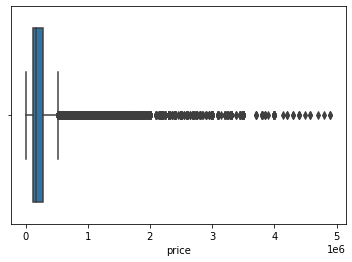

In [100]:
mascara3=data1[mascara2].price<5000000
sns.boxplot(x=data1[mascara2][mascara3]['price'])
data1[mascara2][mascara3].shape

In [101]:
data1[mascara2][mascara3]['price'].quantile(0.975)

1032866.0

In [102]:
data1[mascara2][mascara3]['price'].quantile(0.025)

69000.0

Siendo el 97,5% de los datos alrededor de 2,5 *Sigma*, tomare este criterio para el análisis.

(85431, 17)

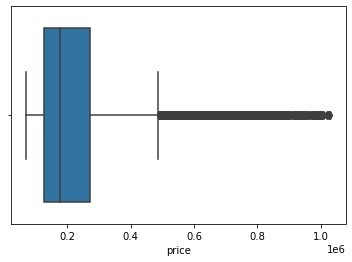

In [103]:
mascara4=(data1[mascara2].price<1032866)&(data1[mascara2].price>69000)
sns.boxplot(x=data1[mascara2][mascara4]['price'])
data1[mascara2][mascara4].shape

<Figure size 1080x576 with 0 Axes>

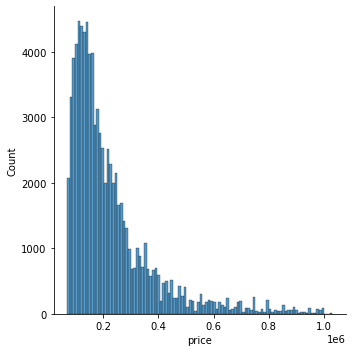

In [104]:
plt.figure(figsize= (15,8))
sns.displot(x=data1[mascara2][mascara4]['price'],bins=100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar la distribución de la variable precio dentro de los rangos.

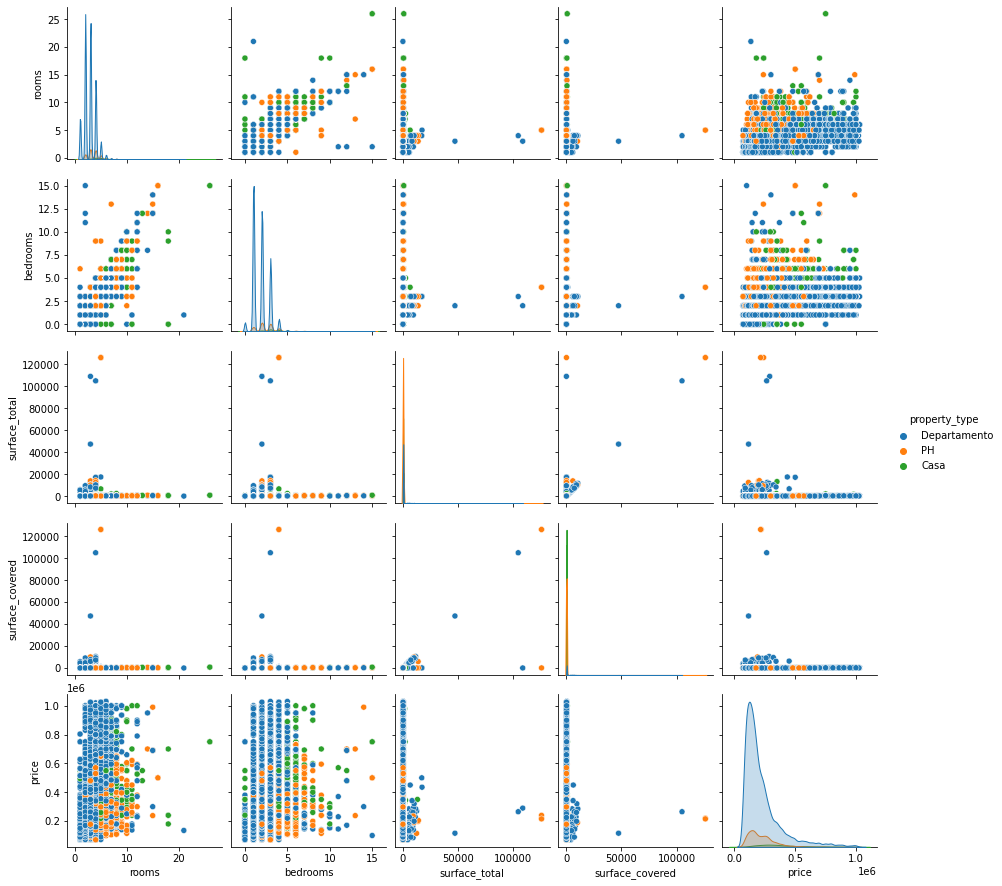

In [105]:
sns.pairplot(data1[mascara2][mascara4], vars=['rooms','bedrooms','surface_total','surface_covered','price'], hue='property_type')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [106]:
data1[mascara2].describe()

rooms    bedrooms   bathrooms  surface_total  surface_covered  \
count 90041.00000 90041.00000 90041.00000    90041.00000      90041.00000   
mean      2.95916     1.95573     1.56009      113.77523         92.06467   
std       1.30367     1.06568     0.85012      939.65831        731.47897   
min       1.00000     0.00000     1.00000       12.00000          1.00000   
25%       2.00000     1.00000     1.00000       51.00000         46.00000   
50%       3.00000     2.00000     1.00000       78.00000         68.00000   
75%       4.00000     3.00000     2.00000      105.00000         91.00000   
max      26.00000    15.00000    14.00000   126062.00000     126062.00000   

               price  
count    90041.00000  
mean    260139.78359  
std     323751.14534  
min       6000.00000  
25%     122000.00000  
50%     175500.00000  
75%     279000.00000  
max   32434232.00000

Para determinar la correcta utilización de los datos para visualizar la matriz de correlación, optaré por utilizar el criterio del Quantile. Dentro de este criterio tomare tanto el 2,5% y el 97,5% de los datos, teniendo en cuenta 2,5 **Sigma**

Dicho esto calcularé, dichos quantiles para determinar el filtro del Data Set.

In [107]:
data1[mascara2]['surface_total'].quantile(0.975)

334.0

In [108]:
data1[mascara2]['surface_total'].quantile(0.025)

31.0

In [109]:
data1[mascara2]['price'].quantile(0.025)

69000.0

In [110]:
data1[mascara2]['price'].quantile(0.975)

1050000.0

In [111]:
mascara_filtro=(data1[mascara2].surface_total>31)&(data1[mascara2].surface_total<334)&(data1[mascara2].price<1050000)&(data1[mascara2].price>69000)


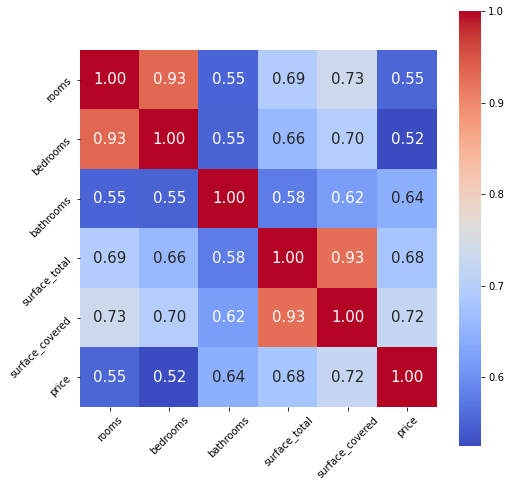

In [112]:
corr = data1[mascara2][mascara_filtro].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Visualizando la matriz de Correlación podemos notar en una primer instancia una gran correlación entre la variable rooms y bedrooms. Luego también notamos una fuerte correlación entre las variables Superficie Total y Superficie Cubierta. Podemos concluir que dichas variables se explican entre sí por lo que en el modelo utilizaremos una variable de ambos pares, para no penalizar el modelo.

En este Proyecto, la variable que nos interesariía analizar es la variable "Precio", por lo que sería ocurrente analizar la última fila, y los datos que tenga un valor cercano a 1, querrá decir que tienen una correlación con dicha variable,

In [113]:
data1[mascara2].shape

(90041, 17)

In [114]:
data1[mascara2][mascara_filtro].shape

(82337, 17)

**Parte 3: Modelo de Machine Learning**

In [3]:
data_ml= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data_ml = data_ml.rename(columns={'l2': 'Zona', 'l1': 'País','l3':'Distrito'})
data_ml.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
País               146660
Zona               146660
Distrito           146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

In [4]:
mascaraml=(data_ml.Zona=='Capital Federal')&((data_ml.property_type=='Departamento')|(data_ml.property_type=='Casa')|(data_ml.property_type=='PH'))&(data_ml.surface_total>=15)&(data_ml.surface_total<=1000)&(data_ml.price<=4000000)
data_ml[mascaraml].count()
data_ml1=data_ml[mascaraml][['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
data_ml1.isnull().sum()


rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [5]:
data_ml2=data_ml1.dropna()
data_ml2.isnull().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [6]:
data_ml2.shape

(81019, 6)

Ya tengo mi dataset listo, con todos los filtros realizados para poder crear mis modelos.

Voy a realizar un **Modelo benchmark** que servirá para tener una métrica base del Modelo. Para dicho Modelo utilizaré el Modelo de Regresión Lineal.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

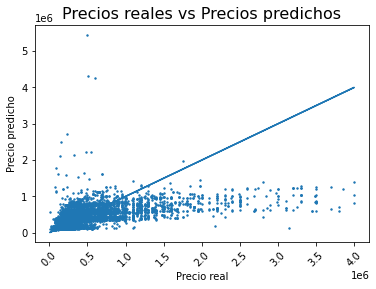

In [11]:
linear_model = LinearRegression()

X_bench = data_ml2[["rooms","bathrooms","surface_covered"]]
y = data_ml2.price

X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X_bench, y, test_size=0.30, random_state=42)

linear_model.fit(X_train_bench, y_train_bench)

y_train_pred_bench = linear_model.predict(X_train_bench)
y_test_pred_bench = linear_model.predict(X_test_bench)

train_r2_bench = r2_score(y_train_bench,y_train_pred_bench)
train_r2_ajust_bench = 1-(1-train_r2_bench)*(len(y_train_bench)-1)/(len(y_train_bench)-X_bench.shape[1]-1)
    
test_r2_bench = r2_score(y_test_bench,y_test_pred_bench)
test_r2_ajust_bench = 1-(1-test_r2_bench)*(len(y_test_bench)-1)/(len(y_test_bench)-X_bench.shape[1]-1)

rmse_train_bench = np.sqrt(mean_squared_error(y_train_bench, y_train_pred_bench))
rmse_test_bench = np.sqrt(mean_squared_error(y_test_bench, y_test_pred_bench))

#print(f'R2 ajustado en Train: {round(train_r2_ajust_bench,4)}')
#print(f'R2 ajustado en Test: {round(test_r2_ajust_bench,4)}')
#print(f'Raíz del error cuadrático medio en Train: {round(rmse_train_bench)}')
#print(f'Raíz del error cuadrático medio en Test: {round(rmse_test_bench)}')

plt.scatter(y_test_bench,y_test_pred_bench, s =2)
plt.plot(y_test_bench,y_test_bench)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precios reales vs Precios predichos",fontsize=16)
plt.xticks(rotation=45)

In [ ]:
print("Train:",train_r2_bench,train_r2_ajust_bench,"Test:",test_r2_bench,test_r2_ajust_bench)

La métrica utilizada es R2 que me indica que tanto se ajustan los datos al modelo. Adopta valores en el intervalo 0 a 1, donde 1 indica que el modelo se ajusta perfectamente a los datos. Valores muy alto de este indicador podria ser indicio de sobre-ajuste, mientras que valores cercanos a 0 indicaria sub-ajuste. El intervalo optimo está en funcion del tipo de problematica planteado (para problemas economicos como el planteado, valores proximos a 0.75 podrian ser optimos)

El R2 ajustado también indica qué tan bien se ajustan los términos a una curva o línea, pero se ajusta para la cantidad de términos en un modelo. Si agrega más y más inútil variables a un modelo, el R cuadrado ajustado disminuirá. El r2 ajustado siempre sera menor o igual al R2. Se busca al igual que el R2, valores cercanos a 1.

Como era de esperar el R2 y el R2 ajustado dan muy por debajo de los 75%, que se consideraría un r2 óptimo, pero este modelo nos servirá de base para seguir mejorandolo.
Podemos visualizar que para grandes precios, el modelo no ajusta bien.

Empezaré con un modelo de **KNN**

Para mi modelo de regresión, eligiré como explique antes, las variables mínimas e indispensables que tengan mayor correlación con la variable Precio a estimar.

In [122]:
X=data_ml2[['rooms','bathrooms','surface_covered']]
y=data_ml2['price']

Para que sea un modelo óptimo se optará por dividir el dataset, en datos de entrenamiento y en datos de testeo, para que el modelo no sobreajuste y se acostumbre solo a los datos del dataset y que siga teniendo valores óptimos para otros datos.

In [123]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_ml2,random_state=0,train_size=0.7,test_size=0.3)

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

Antes de analizar y profundizar sobre el modelo, voy a realizar un modelo simple con n_neighboors=2 para ver como da el R2.

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn_regressor = KNeighborsRegressor(2)
knn_regressor.fit(X_train, y_train)
y_pred_train=knn_regressor.predict(X_train)
y_pred_test=knn_regressor.predict(X_test)
train=r2_score(y_train,y_pred_train)
test=r2_score(y_test,y_pred_test)
print(train,test)

0.808578275385644 0.7005468512031376


Podemos notar que el Modelo de Training da muy bien pero hay una diferencia con el de testing y que este no supera un 75%.

Voy a analizar el hiperparámetro de vecinos cercanos para ver el número que mejor describe el modelo.

In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
z=[]
z1=[]
for i in range(1,20):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    knn_regressor.fit(X_train, y_train)
    y_pred_train=knn_regressor.predict(X_train)
    y_pred_test=knn_regressor.predict(X_test)
    z.append(r2_score(y_train,y_pred_train))
    z1.append(r2_score(y_test,y_pred_test))

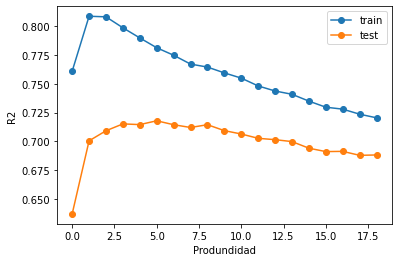

In [127]:
plt.plot(z,'o-',label='train' )
plt.plot(z1,'o-',label='test')
plt.legend()
plt.xlabel('Produndidad')
plt.ylabel('R2')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar que el número de vecinos cercanos igual a 6 es donde el modelo mejor se adapta a los datos de testing, por lo que sería sensato elegir un n_neighbors= 6.

Modelo de **Árboles de Decisión**

In [128]:
X1=data_ml2[['rooms','bathrooms','surface_covered']]
y1=data_ml2['price']

In [129]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_ml2,random_state=0,train_size=0.7,test_size=0.3)

In [130]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1)

Tomaré una profundidad modelo, para analizar como da R2, para luego profundizar sobre los hiperparámetros y poder llegar a un modelo óptimo.

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X1_train, y1_train)
y1_pred_train=tree_regressor.predict(X1_train)
y1_pred_test=tree_regressor.predict(X1_test)
train1=r2_score(y1_train,y1_pred_train)
test1=r2_score(y1_test,y1_pred_test)
print(train1,test1)

0.6715364909438994 0.6704285723270114


In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
z2=[]
z3=[]
for i in range(1,20):
    tree_regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
    tree_regressor.fit(X1_train, y1_train)
    y1_pred_train=tree_regressor.predict(X1_train)
    y1_pred_test=tree_regressor.predict(X1_test)
    z2.append(r2_score(y1_train,y1_pred_train))
    z3.append(r2_score(y1_test,y1_pred_test))

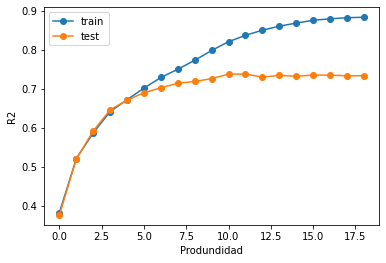

In [133]:
plt.plot(z2,'o-',label='train' )
plt.plot(z3,'o-',label='test')
plt.legend()
plt.xlabel('Produndidad')
plt.ylabel('R2')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar que el número de profundidad cercano igual a 13 es donde el modelo mejor se adapta a los datos de testing, por lo que sería sensato elegir un max_depth=12.

Compararemos ambos modelos segun los datos reales vs los datos predichos para ver como se adaptan.

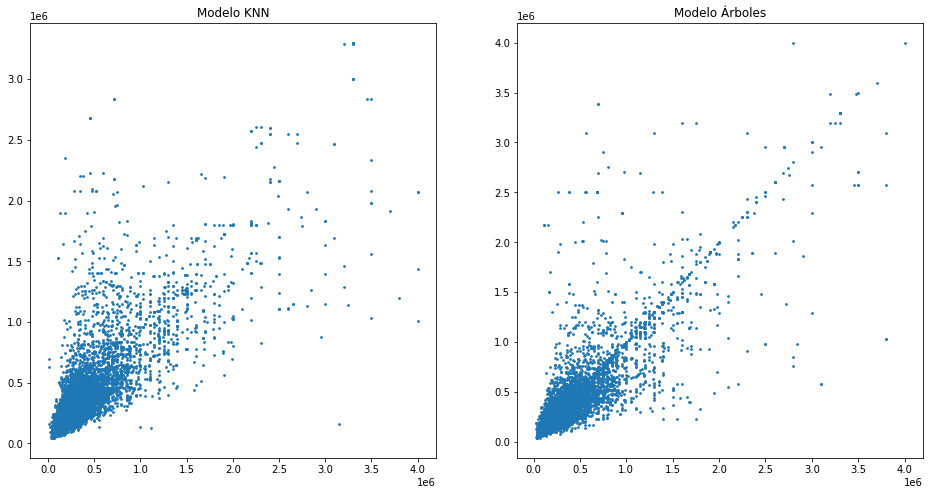

In [134]:
fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
ax1.scatter(y_test,y_pred_test,s=3)
ax1.set_title("Modelo KNN")
ax2.set_title("Modelo Árboles")
ax2.scatter(y1_test,y1_pred_test,s=3)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como el gráfico del Modelo de Árboles se adapta mejor para grandes valores del precio en comparación con KNN.

Veamos que modelo se adapta mejor a los datos.

In [135]:
max(z1)

0.7179244619212233

In [136]:
max(z3)

0.7375179063397824

Optaré por el modelo de Árboles de Decisión dado que podemos visualizar que en el gráfico hay una dispersión más lineal y el R2 máximo de cada uno de los modelos es el mayor y que llega al 75%. Vamos a seguir trabajando para mejorar dicho modelo agregando otras variables y normalizando los datos.

Voy a analizar la métrica del error medio absoluto.

In [137]:
from sklearn.metrics import mean_absolute_error

In [138]:
mean_absolute_error(y_test,y_pred_test)

74708.00668840701

El error absoluto medio sirve para cuantificar la precisión de una técnica de predicción comparando por ejemplo los valores predichos frente a los observados, el tiempo real frente al tiempo previsto, o una técnica de medición frente a otra técnica alternativa de medición.

Esta métrica no me termina dando una idea clara sobre el modelo, es por este motivo que anteriormente grafique el R2 y no el error medio cuadrado para poder tener un análisis mas certero del modelo. Lo ideal de error, es que así bien queremos que vaya aumentando el R2 al ir mejorando el modelo, queremos que el error vaya disminuyendo a medida que mejoramos el modelo.

In [139]:
X1=data_ml2[['rooms','bathrooms','surface_covered']]
y1=data_ml2['price']

Normalizaré los datos para evaluar el modelo con los datos normalizados.

La Normalización me permite: minimizar la redundancia de los datos, disminuir problemas de actualización de los datos en las tablas, proteger la integridad de datos.

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
Scaler=StandardScaler()
Scaler.fit(X1)
X1_scaled=Scaler.transform(X1)

In [142]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_ml2,random_state=0,train_size=0.7,test_size=0.3)

In [143]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1_scaled,y1)

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree_regressor = DecisionTreeRegressor(max_depth=12)
tree_regressor.fit(X1_train, y1_train)
y2_pred_train=tree_regressor.predict(X1_train)
y2_pred_test=tree_regressor.predict(X1_test)
train2=r2_score(y1_train,y2_pred_train)
test2=r2_score(y1_test,y2_pred_test)
print(train2,test2)

0.8402778162400014 0.7429676579105384


Podemos notar como la normalización de los datos no me ayudo a mejorar mi modelo cuando comparo la mismoa profundidad con el modelo con los datos no normalizados, por lo que seguiré intentando mejorarlo con otros métodos.

Dado que el Modelo con los datos **no** Normalizados me dio un R2 de 0,75 y el Modelo con los datos Normalizados tambíen, voy a seguir intentando mejorar el modelo con otras opciones.

La consigna el Proyecto solicitaba usar las siguientes variables: Baños, Ambientes, Cuartos, Superficie Cubierta, Superficie Total y Precio. Pero creo que hay una variable que podría influir en una mejora del modelo como es **El Distrito** donde se ubique la propiedad.

Dado que entiendo, que la ubicación es una variable clave en lo que es la tasación de una propiedad, pasaré a incluir dicha variable a pesar de ser categórica, y analizaré la significancia de la misma en mi Modelo. Analizaré si mejoró el modelo con la inclusión de dicha variable o no.

In [74]:
mascaram2=(data_ml.Zona=='Capital Federal')&((data_ml.property_type=='Departamento')|(data_ml.property_type=='Casa')|(data_ml.property_type=='PH'))&(data_ml.surface_total>=15)&(data_ml.surface_total<=1000)&(data_ml.price<=4000000)
data_ml[mascaram2].count()
data_ml1_cat=data_ml[mascaram2][['rooms','bedrooms','bathrooms','surface_total','surface_covered','Distrito','price']]
data_ml1_cat.isnull().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
Distrito             0
price                0
dtype: int64

In [75]:
data_ml2_cat=data_ml1_cat.dropna()
data_ml2_cat.isnull().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
Distrito           0
price              0
dtype: int64

In [76]:
data_con_dummies1 = pd.get_dummies(data_ml2_cat, drop_first=True)

In [77]:
data_con_dummies1.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered        price  \
0 7.00000   7.00000    2.00000      140.00000        140.00000 153000.00000   
1 2.00000   1.00000    2.00000       70.00000         58.00000 159000.00000   
2 2.00000   1.00000    1.00000       45.00000         45.00000 125000.00000   
3 2.00000   1.00000    1.00000       85.00000         50.00000 295000.00000   
5 2.00000   1.00000    1.00000       56.00000         56.00000 150000.00000   

   Distrito_Agronomía  Distrito_Almagro  Distrito_Balvanera  \
0                   0                 0                   0   
1                   0                 0                   0   
2                   0                 0                   0   
3                   0                 0                   0   
5                   0                 0                   0   

   Distrito_Barracas  ...  Distrito_Villa Lugano  Distrito_Villa Luro  \
0                  0  ...                      0                    0   
1                  0  ...                      0                    0   
2                  0  ...                      0                    0   
3                  0  ...                      0                    0   
5                  0  ...                      0                    0   

   Distrito_Villa Ortuzar  Distrito_Villa Pueyrredón  Distrito_Villa Real  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
5                       0                          0                    0   

   Distrito_Villa Riachuelo  Distrito_Villa Santa Rita  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
5                         0                          0   

   Distrito_Villa Soldati  Distrito_Villa Urquiza  Distrito_Villa del Parque  
0                       0                       0                          0  
1                       0                       0                          0  
2                       0                       0                          0  
3                       0                       0                          0  
5                       0                       0                          0  

[5 rows x 62 columns]

In [78]:
X_cat=data_con_dummies1[['rooms'    ,'bathrooms'  , 'surface_covered', 'Distrito_Agronomía'  ,'Distrito_Almagro' , 'Distrito_Balvanera' , 'Distrito_Barracas' , 'Distrito_Barrio Norte' , 'Distrito_Belgrano' , 'Distrito_Boca' , 'Distrito_Boedo' , 'Distrito_Caballito' , 'Distrito_Catalinas' , 'Distrito_Centro / Microcentro' , 'Distrito_Chacarita' ,'Distrito_Coghlan' , 'Distrito_Colegiales' , 'Distrito_Congreso' , 'Distrito_Constitución' , 'Distrito_Flores' , 'Distrito_Floresta' , 'Distrito_Las Cañitas' , 'Distrito_Liniers' , 'Distrito_Mataderos' , 'Distrito_Monserrat' , 'Distrito_Monte Castro' , 'Distrito_Nuñez' , 'Distrito_Once' , 'Distrito_Palermo' , 'Distrito_Parque Avellaneda' , 'Distrito_Parque Centenario' , 'Distrito_Parque Chacabuco' , 'Distrito_Parque Chas' , 'Distrito_Parque Patricios' , 'Distrito_Paternal',  'Distrito_Pompeya' , 'Distrito_Puerto Madero' , 'Distrito_Recoleta' , 'Distrito_Retiro' , 'Distrito_Saavedra' , 'Distrito_San Cristobal' , 'Distrito_San Nicolás' , 'Distrito_San Telmo' , 'Distrito_Tribunales' , 'Distrito_Velez Sarsfield' , 'Distrito_Versalles' , 'Distrito_Villa Crespo' , 'Distrito_Villa Devoto' , 'Distrito_Villa General Mitre' , 'Distrito_Villa Lugano' , 'Distrito_Villa Luro' , 'Distrito_Villa Ortuzar' , 'Distrito_Villa Pueyrredón' , 'Distrito_Villa Real' , 'Distrito_Villa Riachuelo' , 'Distrito_Villa Santa Rita' , 'Distrito_Villa Soldati','Distrito_Villa Urquiza','Distrito_Villa del Parque']]
y_cat=data_con_dummies1['price']

In [79]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_con_dummies1,random_state=0,train_size=0.7,test_size=0.3)

In [80]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_cat,y_cat)

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
tree_regressor.fit(X1_train, y1_train)
ycat_pred_train=tree_regressor.predict(X1_train)
ycat_pred_test=tree_regressor.predict(X1_test)
train3=r2_score(y1_train,ycat_pred_train)
test3=r2_score(y1_test,ycat_pred_test)
test3_r2_ajust = 1-(1-test3)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
print("R2:",train3,test3,"R2 Ajustado:",test3_r2_ajust)

R2: 0.9192697860150283 0.8650583303279101 R2 Ajustado: 0.8646640961852683


Podemos notar como aumenta el R2 notoriamente, dado que la zona donde esta ubicado es una variable que explica mucho la variabilidad del Precio, y logro tener un modelo de un 83% con una profundidad de 12.
Podemos notar como el R2 Ajustado da apenas menor que el R2 por lo que me indica que no esta penalizando las variables agregadas, por que lo fue efectivo haber agregado la variable **"Distrito"**

Voy a hacer un análisis del hiperparámetro de la profundidad de dicho Modelo.

In [82]:
X_cat2=data_con_dummies1[['rooms'    ,'bathrooms'  , 'surface_covered', 'Distrito_Agronomía'  ,'Distrito_Almagro' , 'Distrito_Balvanera' , 'Distrito_Barracas' , 'Distrito_Barrio Norte' , 'Distrito_Belgrano' , 'Distrito_Boca' , 'Distrito_Boedo' , 'Distrito_Caballito' , 'Distrito_Catalinas' , 'Distrito_Centro / Microcentro' , 'Distrito_Chacarita' ,'Distrito_Coghlan' , 'Distrito_Colegiales' , 'Distrito_Congreso' , 'Distrito_Constitución' , 'Distrito_Flores' , 'Distrito_Floresta' , 'Distrito_Las Cañitas' , 'Distrito_Liniers' , 'Distrito_Mataderos' , 'Distrito_Monserrat' , 'Distrito_Monte Castro' , 'Distrito_Nuñez' , 'Distrito_Once' , 'Distrito_Palermo' , 'Distrito_Parque Avellaneda' , 'Distrito_Parque Centenario' , 'Distrito_Parque Chacabuco' , 'Distrito_Parque Chas' , 'Distrito_Parque Patricios' , 'Distrito_Paternal',  'Distrito_Pompeya' , 'Distrito_Puerto Madero' , 'Distrito_Recoleta' , 'Distrito_Retiro' , 'Distrito_Saavedra' , 'Distrito_San Cristobal' , 'Distrito_San Nicolás' , 'Distrito_San Telmo' , 'Distrito_Tribunales' , 'Distrito_Velez Sarsfield' , 'Distrito_Versalles' , 'Distrito_Villa Crespo' , 'Distrito_Villa Devoto' , 'Distrito_Villa General Mitre' , 'Distrito_Villa Lugano' , 'Distrito_Villa Luro' , 'Distrito_Villa Ortuzar' , 'Distrito_Villa Pueyrredón' , 'Distrito_Villa Real' , 'Distrito_Villa Riachuelo' , 'Distrito_Villa Santa Rita' , 'Distrito_Villa Soldati','Distrito_Villa Urquiza','Distrito_Villa del Parque']]
y_cat2=data_con_dummies1['price']

In [83]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_con_dummies1,train_size=0.7,test_size=0.3)

In [84]:
X12_train,X12_test,y12_train,y12_test=train_test_split(X_cat2,y_cat2)

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
z4=[]
z5=[]
for i in range(1,20):
    tree_regressor = DecisionTreeRegressor(max_depth=i)
    tree_regressor.fit(X12_train, y12_train)
    ycat1_pred_train=tree_regressor.predict(X12_train)
    ycat1_pred_test=tree_regressor.predict(X12_test)
    z4.append(r2_score(y12_train,ycat1_pred_train))
    z5.append(r2_score(y12_test,ycat1_pred_test))

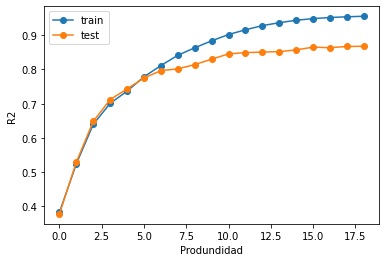

In [86]:
plt.plot(z4,'o-',label='train' )
plt.plot(z5,'o-',label='test')
plt.legend()
plt.xlabel('Produndidad')
plt.ylabel('R2')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [158]:
max(z5)

0.873409749051246

De esta manera podemos analizar que para una profundidad de 12, el R2 llega a su máximo valor de 87%.

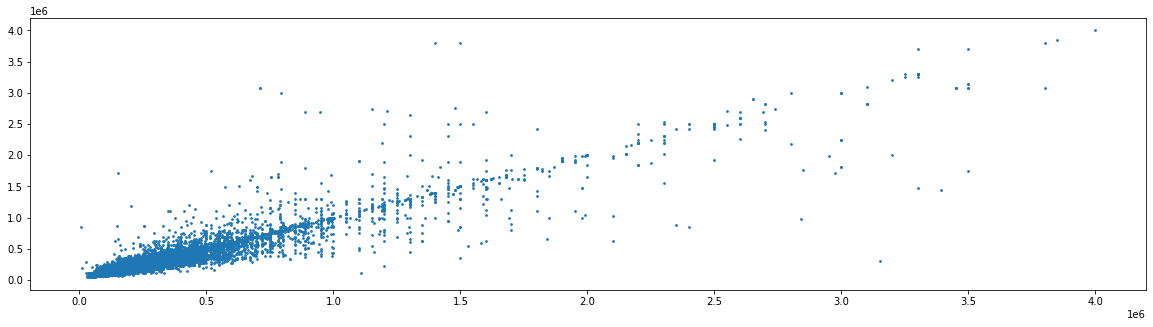

In [159]:
plt.figure(figsize= (20,5))
plt.scatter(y12_test,ycat1_pred_test,s=3)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como el modelo se ajusta muy bien para precios menores a 3 Millones de dolares

Pasaré a analizar el R ajustado de dicho modelo, si bien ya lo he hecho antes, lo hare de otra manera.

In [160]:
X_cat3=data_con_dummies1[['rooms'    ,'bathrooms'  , 'surface_covered', 'Distrito_Agronomía'  ,'Distrito_Almagro' , 'Distrito_Balvanera' , 'Distrito_Barracas' , 'Distrito_Barrio Norte' , 'Distrito_Belgrano' , 'Distrito_Boca' , 'Distrito_Boedo' , 'Distrito_Caballito' , 'Distrito_Catalinas' , 'Distrito_Centro / Microcentro' , 'Distrito_Chacarita' ,'Distrito_Coghlan' , 'Distrito_Colegiales' , 'Distrito_Congreso' , 'Distrito_Constitución' , 'Distrito_Flores' , 'Distrito_Floresta' , 'Distrito_Las Cañitas' , 'Distrito_Liniers' , 'Distrito_Mataderos' , 'Distrito_Monserrat' , 'Distrito_Monte Castro' , 'Distrito_Nuñez' , 'Distrito_Once' , 'Distrito_Palermo' , 'Distrito_Parque Avellaneda' , 'Distrito_Parque Centenario' , 'Distrito_Parque Chacabuco' , 'Distrito_Parque Chas' , 'Distrito_Parque Patricios' , 'Distrito_Paternal',  'Distrito_Pompeya' , 'Distrito_Puerto Madero' , 'Distrito_Recoleta' , 'Distrito_Retiro' , 'Distrito_Saavedra' , 'Distrito_San Cristobal' , 'Distrito_San Nicolás' , 'Distrito_San Telmo' , 'Distrito_Tribunales' , 'Distrito_Velez Sarsfield' , 'Distrito_Versalles' , 'Distrito_Villa Crespo' , 'Distrito_Villa Devoto' , 'Distrito_Villa General Mitre' , 'Distrito_Villa Lugano' , 'Distrito_Villa Luro' , 'Distrito_Villa Ortuzar' , 'Distrito_Villa Pueyrredón' , 'Distrito_Villa Real' , 'Distrito_Villa Riachuelo' , 'Distrito_Villa Santa Rita' , 'Distrito_Villa Soldati','Distrito_Villa Urquiza','Distrito_Villa del Parque']]
y_cat3=data_con_dummies1['price']

In [161]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_con_dummies1,train_size=0.7,test_size=0.3)

In [162]:
X13_train,X13_test,y13_train,y13_test=train_test_split(X_cat3,y_cat3)

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree_regressor_rajus = DecisionTreeRegressor(max_depth=12)
tree_regressor_rajus.fit(X13_train, y13_train)
yhat= tree_regressor_rajus.predict(X13_train)
yhat1= tree_regressor_rajus.predict(X13_test)
SS_residual= sum((y13_train-yhat)**2)
SS_total=sum((y13_train-np.mean(y13_train))**2)
r_squared= 1 - (float (SS_residual)) / SS_total
adjusted_r_squared=1-(1-r_squared)*(len(y13_train)-1)/(len(y13_train)-X_cat3.shape[1]-1)
SS_residual1= sum((y13_test-yhat1)**2)
SS_total1=sum((y13_test-np.mean(y13_test))**2)
r_squared1= 1 - (float (SS_residual1)) / SS_total1
adjusted_r_squared1=1-(1-r_squared1)*(len(y13_test)-1)/(len(y13_test)-X_cat3.shape[1]-1)
r2=r2_score(y13_train,yhat)
r21=r2_score(y13_test,yhat1)
print("Train:","R cuadrado:",r_squared,"R ajustado:",adjusted_r_squared)
print("Test:","R cuadrado:",r_squared1,"R ajustado:",adjusted_r_squared1)

Train: R cuadrado: 0.9196172468735969 R ajustado: 0.9195391205156228
Test: R cuadrado: 0.852937127610067 R ajustado: 0.8525074811891209


Con el R ajustado muy similiar al R2 podemos decir que no esta penalizando la cantidad de variables por lo que la variable agregada del Distrito es muy significativa para mejorar el modelo como ya he explicado anteriormente.

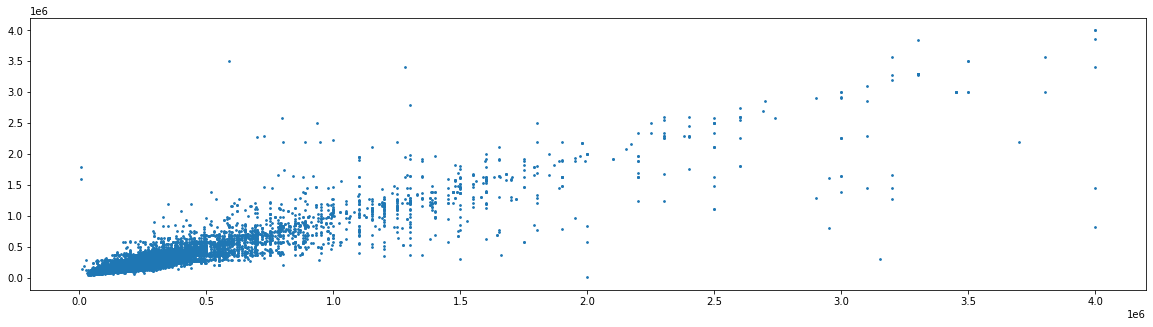

In [164]:
plt.figure(figsize= (20,5))
plt.scatter(y13_test,yhat1,s=3)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Se puede visualizar como el modelo a partir de 3 Millones de dolares sigue teniendo un error grande, lo que quizas me explique que sería conveniente al dataset hacerle un filtro menor a 3 Millones de Dolares y luego hacer otro modelo entre 3 Millones de Dolares y 4 Millones de dolares.

In [165]:
Tipos=['Modelo Reg.Lineal Bench','Modelo Tree','Modelo Tree Normalizado','Modelo Tree con Dummies']
Rcuadrado_train=[train_r2_bench,max(z2),train2,train3]
Rcuadrado_test=[test_r2_bench,max(z3),test2,test3]
Datos=pd.DataFrame({"Tipos":Tipos,"R2Train":Rcuadrado_train,"R2Test":Rcuadrado_test})

Graficaré los distintos modelos con su respectivo R2 para los datos del testeo.

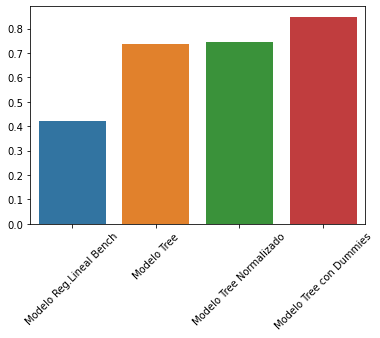

In [166]:
sns.barplot(data=Datos,x=Tipos, y=Rcuadrado_test)
plt.xticks(rotation = 45)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos visualizar el progreso del Modelo con el dataset de testeo, y como fue evolucionando.

Por lo que las conclusiones finales del modelo son:
El modelo bench es el que posee menor capacidad predictiva. Este resultado está en línea con lo esperado, siendo que los otros modelos planteados tiene mayor grado de profundizacion y análisis.
El modelo normalizado no mejora la capacidad predictiva del modelo, solamente achica la brecha entre el modelo de training y de testo. Esto es de esperarse, dado que los datos que normaliza tiene distribucion beta asimetrica, la cual es parecida a una normal.
El modelo con Dummies (Distritos) mejora notiramente la capacidad predictiva del modelo.

Si bien ya he mejorado el modelo, voy a agregar la variable categórica tipo de Propiedad para ver si mejora el modelo o no con respecto al último logrado, si bien ya he hecho unas conclusiones anteriormente, seguiré buscandole una mejora.

In [69]:
data_ml1_cat1=data_ml[mascaram2][['rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type','Distrito','price']]
data_ml1_cat1.isnull().sum()
data_ml1_cat1.shape

(82373, 8)

In [87]:
data_ml2_cat1=data_ml1_cat1.dropna()
data_ml2_cat1.isnull().sum()
data_ml2_cat1.shape

(81019, 8)

In [88]:
data_con_dummies2 = pd.get_dummies(data_ml2_cat1, drop_first=True)

In [89]:
data_con_dummies2.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered        price  \
0 7.00000   7.00000    2.00000      140.00000        140.00000 153000.00000   
1 2.00000   1.00000    2.00000       70.00000         58.00000 159000.00000   
2 2.00000   1.00000    1.00000       45.00000         45.00000 125000.00000   
3 2.00000   1.00000    1.00000       85.00000         50.00000 295000.00000   
5 2.00000   1.00000    1.00000       56.00000         56.00000 150000.00000   

   property_type_Departamento  property_type_PH  Distrito_Agronomía  \
0                           1                 0                   0   
1                           0                 1                   0   
2                           0                 1                   0   
3                           0                 1                   0   
5                           0                 1                   0   

   Distrito_Almagro  ...  Distrito_Villa Lugano  Distrito_Villa Luro  \
0                 0  ...                      0                    0   
1                 0  ...                      0                    0   
2                 0  ...                      0                    0   
3                 0  ...                      0                    0   
5                 0  ...                      0                    0   

   Distrito_Villa Ortuzar  Distrito_Villa Pueyrredón  Distrito_Villa Real  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
5                       0                          0                    0   

   Distrito_Villa Riachuelo  Distrito_Villa Santa Rita  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
5                         0                          0   

   Distrito_Villa Soldati  Distrito_Villa Urquiza  Distrito_Villa del Parque  
0                       0                       0                          0  
1                       0                       0                          0  
2                       0                       0                          0  
3                       0                       0                          0  
5                       0                       0                          0  

[5 rows x 64 columns]

In [90]:
X_cat4=data_con_dummies2[['rooms'    ,'bathrooms'  , 'surface_covered', 'Distrito_Agronomía'  ,'Distrito_Almagro' , 'Distrito_Balvanera' , 'Distrito_Barracas' , 'Distrito_Barrio Norte' , 'Distrito_Belgrano' , 'Distrito_Boca' , 'Distrito_Boedo' , 'Distrito_Caballito' , 'Distrito_Catalinas' , 'Distrito_Centro / Microcentro' , 'Distrito_Chacarita' ,'Distrito_Coghlan' , 'Distrito_Colegiales' , 'Distrito_Congreso' , 'Distrito_Constitución' , 'Distrito_Flores' , 'Distrito_Floresta' , 'Distrito_Las Cañitas' , 'Distrito_Liniers' , 'Distrito_Mataderos' , 'Distrito_Monserrat' , 'Distrito_Monte Castro' , 'Distrito_Nuñez' , 'Distrito_Once' , 'Distrito_Palermo' , 'Distrito_Parque Avellaneda' , 'Distrito_Parque Centenario' , 'Distrito_Parque Chacabuco' , 'Distrito_Parque Chas' , 'Distrito_Parque Patricios' , 'Distrito_Paternal',  'Distrito_Pompeya' , 'Distrito_Puerto Madero' , 'Distrito_Recoleta' , 'Distrito_Retiro' , 'Distrito_Saavedra' , 'Distrito_San Cristobal' , 'Distrito_San Nicolás' , 'Distrito_San Telmo' , 'Distrito_Tribunales' , 'Distrito_Velez Sarsfield' , 'Distrito_Versalles' , 'Distrito_Villa Crespo' , 'Distrito_Villa Devoto' , 'Distrito_Villa General Mitre' , 'Distrito_Villa Lugano' , 'Distrito_Villa Luro' , 'Distrito_Villa Ortuzar' , 'Distrito_Villa Pueyrredón' , 'Distrito_Villa Real' , 'Distrito_Villa Riachuelo' , 'Distrito_Villa Santa Rita' , 'Distrito_Villa Soldati','Distrito_Villa Urquiza','Distrito_Villa del Parque','property_type_Departamento','property_type_PH']]
y_cat4=data_con_dummies2['price']

In [91]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_con_dummies1,train_size=0.7,test_size=0.3)

In [92]:
X14_train,X14_test,y14_train,y14_test=train_test_split(X_cat4,y_cat4)

In [174]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree_regressor_rajus2 = DecisionTreeRegressor(max_depth=9)
tree_regressor_rajus2.fit(X14_train, y14_train)
yhat= tree_regressor_rajus2.predict(X14_train)
yhat1= tree_regressor_rajus2.predict(X14_test)
SS_residual12= sum((y14_train-yhat)**2)
SS_total12=sum((y14_train-np.mean(y14_train))**2)
r_squared12= 1 - (float (SS_residual12)) / SS_total12
adjusted_r_squared12=1-(1-r_squared12)*(len(y14_train)-1)/(len(y14_train)-X_cat4.shape[1]-1)
SS_residual1= sum((y14_test-yhat1)**2)
SS_total1=sum((y14_test-np.mean(y14_test))**2)
r_squared1= 1 - (float (SS_residual1)) / SS_total1
adjusted_r_squared121=1-(1-r_squared1)*(len(y14_test)-1)/(len(y14_test)-X_cat4.shape[1]-1)
r12=r2_score(y14_train,yhat)
r121=r2_score(y14_test,yhat1)
print("Train:",r_squared12,adjusted_r_squared12)
print("Test:",r_squared1,adjusted_r_squared121)

Train: 0.8664697997902279 0.8663356140597281
Test: 0.823583953765655 0.8230510275625007


In [175]:
dicc={"R2_Ajustado":[adjusted_r_squared,adjusted_r_squared1,adjusted_r_squared12,adjusted_r_squared121],"R2":[r2,r21,r12,r121],"Split":["Train","Test","Train","Test"],"Modelo":["Con Distrito","Con Distrito","Con Distrito y Propiedad","Con Distrito y Propiedad"]}

In [176]:
resultados=pd.DataFrame(dicc)
resultados

R2_Ajustado      R2  Split                    Modelo
0      0.91954 0.91962  Train              Con Distrito
1      0.85251 0.85294   Test              Con Distrito
2      0.86634 0.86647  Train  Con Distrito y Propiedad
3      0.82305 0.82358   Test  Con Distrito y Propiedad

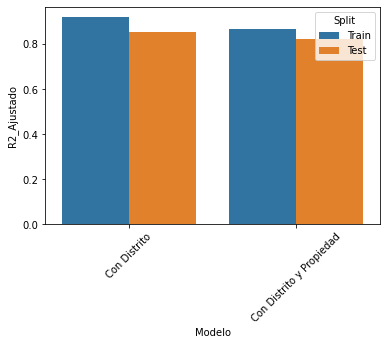

In [177]:
sns.barplot(data=resultados,x="Modelo", y="R2_Ajustado",hue="Split")
plt.xticks(rotation = 45)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

Con este Gráfico podemos notar que el R2 Ajustado empeora cuando agrega la variable categórica del Tipo de Propiedad. Por lo que no obtuvimos un resultado mejor del modelo anteriormente logrado.

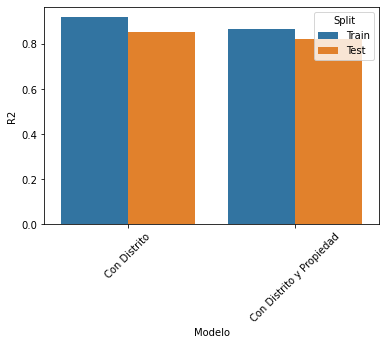

In [178]:
sns.barplot(data=resultados,x="Modelo", y="R2",hue="Split")
plt.xticks(rotation = 45)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como el modelo no mejora cuando se agrega la variable categórica Propiedad, esto puede darse dado que el tipo de propiedad puede estar explicado bajo la variable superficie, dado que cada tipo de propiedad tienen una relación con el tamaño de superficie que puede llegar a tener.

Es por eso que el mejor Modelo que he logrado tiene las siguientes variables: Rooms, Bathrooms, Superficie Cubierta, Distrito y Precio.

Finalmente el mejor modelo logrado es **"Modelo Tree con Dummies"**, que es el modelo que incluye las variables que anteriormente he nombrado.
La evolución del modelo fue la siguiente:

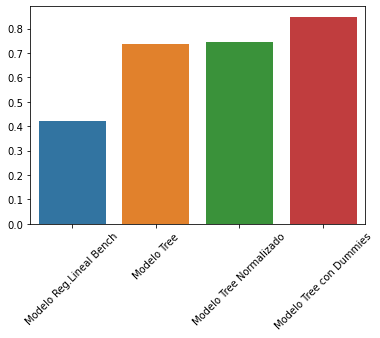

In [179]:
sns.barplot(data=Datos,x=Tipos, y=Rcuadrado_test)
plt.xticks(rotation = 45)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

Se logro un R2 para el dataset de testeo de 83% con una profundidad de 12 y R ajustado de 83% sin penalizar por la cantidad de variables agregadas por la variable Categórica Distrito.

El modelo se ajusta mejor para precios menores a 2.000.000 dolares (para precios mayores, el error se acentúa)
Por lo antedicho, se elije como modelo predictor aquel que incluye las siguientes variables:

Habitaciones
Baños
Superficie Cubierta
Distrito
El modelo será de tipo árbol, con una profundidad de 12.

Como consluión final del proyecto, puedo decir que para mejorar el modelo uno tiene que ir analizando distintas métricas, el r2 y el r2 ajustado explican bien la adaptación de los atributos al modelo.
Se lo puede ir mejorando agregando variables siempre y cuando dichas métricas aumenten llegando lo mas cerca del 1 posible, que indica que los datos se adaptan perfectamente al proyecto.

Al modelo actual la falla que le encuentro como he expresado anteriormente, que para precios mayores a 2 Millones de Dolares, el error que se puede notar en los gráficos donde estan expresados los datos predichos con los datos reales son muy grandes, por lo que el modelo se adaptaría aún mejor para precios menores a 2 Millones de Dolares. Se me ocurre que una posibilidad podría ser segmentar el dataset en dos grupos, segmentado por el precio menor a 2 Millones y mayor a ese monto, y poder crear dos modelos distintos.

Como mejora al último modelo realizado, puedo decir que se lo podría mejorar si por ejemplo se agrega la variable de transportes públicos por la Zona. En Argentina, esta muy bien visto que tranporte público se encuentra cerca de la propiedad, por lo que se me ocurre que sería una variable interesante al incluirla al análisis.

In [16]:
data_ml1_cat1.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered property_type  \
0    7.0       7.0        2.0          140.0            140.0  Departamento   
1    2.0       1.0        2.0           70.0             58.0            PH   
2    2.0       1.0        1.0           45.0             45.0            PH   
3    2.0       1.0        1.0           85.0             50.0            PH   
5    2.0       1.0        1.0           56.0             56.0            PH   

        Distrito     price  
0  San Cristobal  153000.0  
1          Boedo  159000.0  
2        Palermo  125000.0  
3        Palermo  295000.0  
5   Villa Crespo  150000.0

In [17]:
data_ml1_cat1.isnull().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
property_type        0
Distrito             0
price                0
dtype: int64

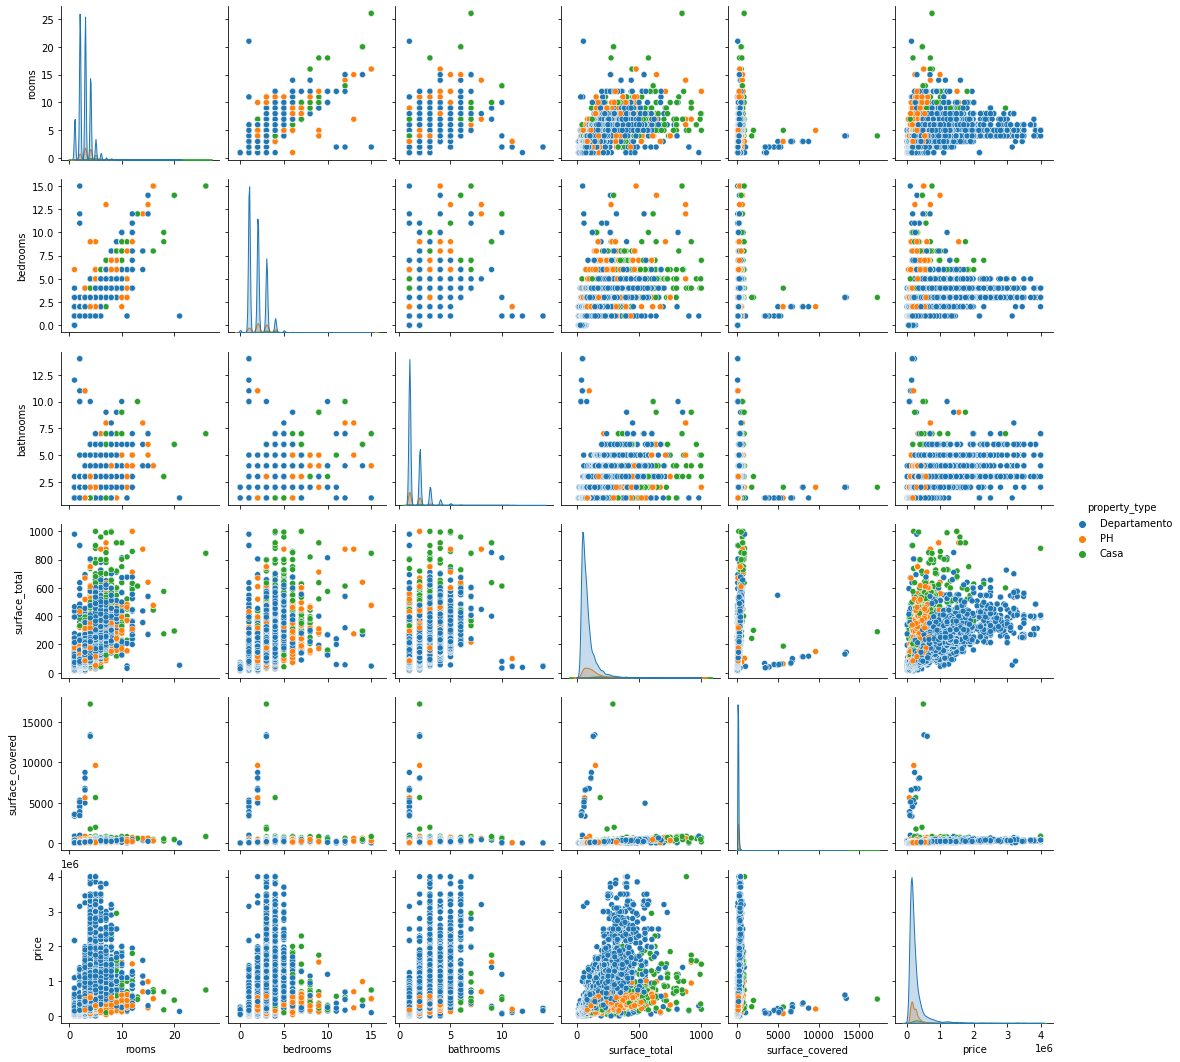

In [184]:
sns.pairplot(data=data_ml1_cat1, hue='property_type')

In [185]:
data_ml1_cat1['surface_total'].quantile(0.025)

30.0

In [187]:
data_ml1_cat1['surface_total'].quantile(0.975)

315.0

In [193]:
data_ml1_cat1['surface_covered'].quantile(0.025)

29.0

In [194]:
data_ml1_cat1['surface_covered'].quantile(0.975)

262.0

In [189]:
data_ml1_cat1['price'].quantile(0.025)

70000.0

In [188]:
data_ml1_cat1['price'].quantile(0.975)

1099000.0

In [192]:
data_ml1_cat1['rooms'].quantile(0.025)

1.0

In [191]:
data_ml1_cat1['rooms'].quantile(0.975)

6.0

In [18]:
mascara1=(data_ml1_cat1.price<1099000)&(data_ml1_cat1.price>70000)&(data_ml1_cat1.surface_covered>29)&(data_ml1_cat1.surface_covered<262)&(data_ml1_cat1.surface_total>30)&(data_ml1_cat1.surface_total<315)&(data_ml1_cat1.rooms<6)

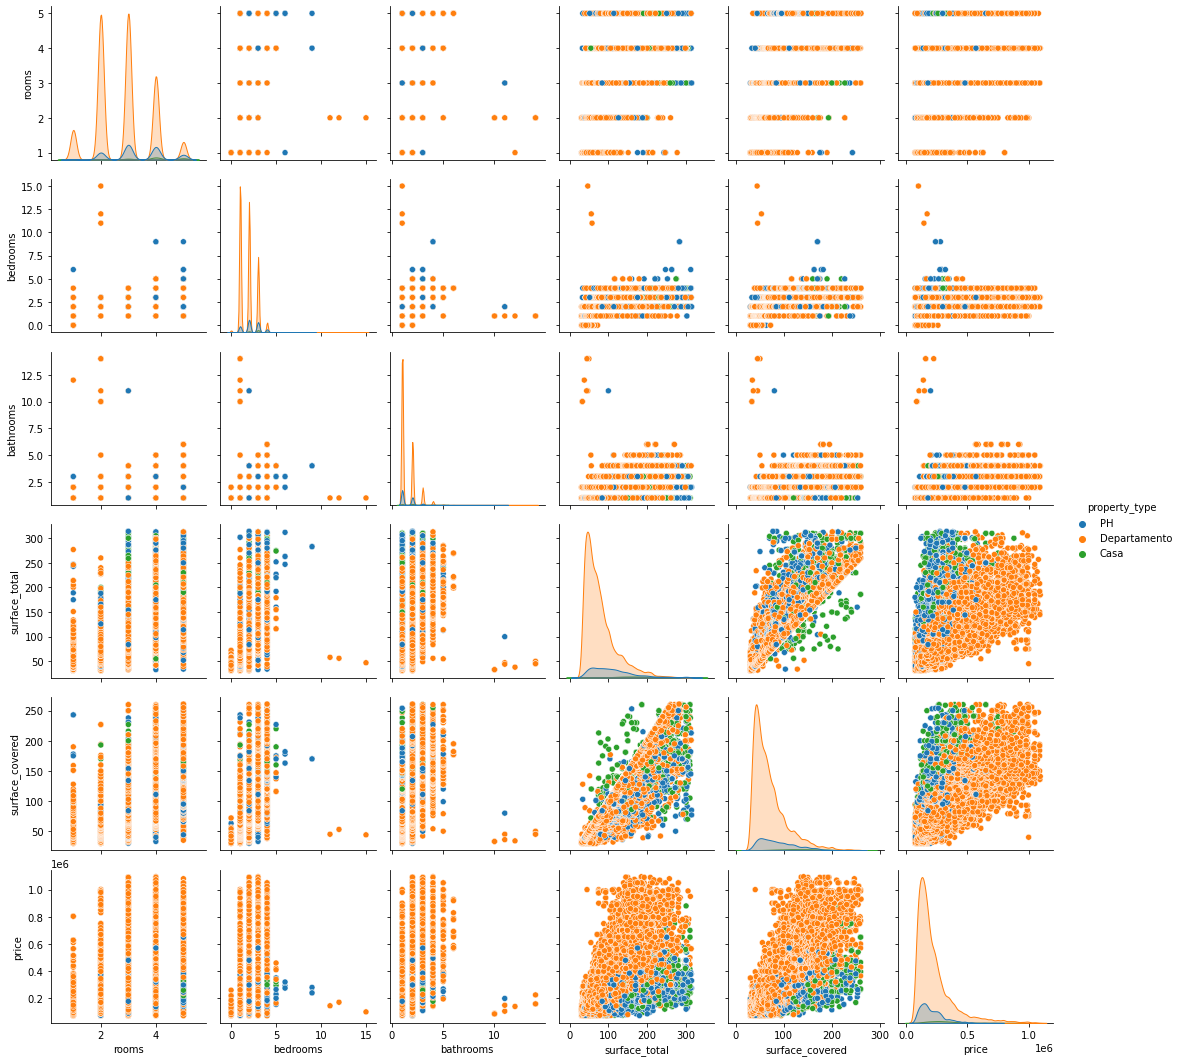

In [198]:
sns.pairplot(data=data_ml1_cat1[mascara1],hue='property_type')

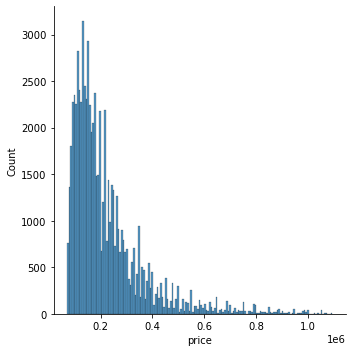

In [199]:
sns.displot(data=data_ml1_cat1[mascara1]['price'])

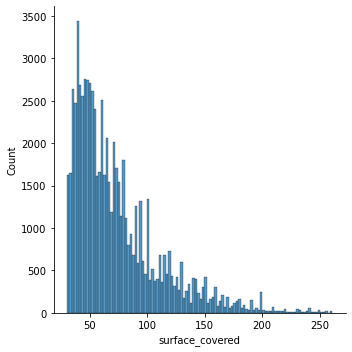

In [200]:
sns.displot(data=data_ml1_cat1[mascara1]['surface_covered'])

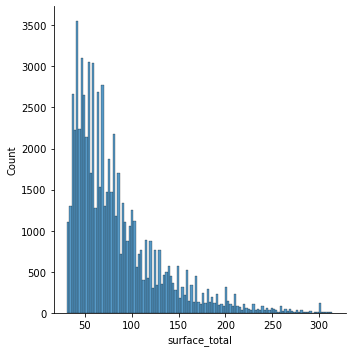

In [201]:
sns.displot(data=data_ml1_cat1[mascara1]['surface_total'])

In [93]:
from sklearn.impute import KNNImputer

In [94]:
data_KNN=data_ml1_cat1[mascara1].copy()

In [95]:
data_KNN.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered property_type  \
1 2.00000   1.00000    2.00000       70.00000         58.00000            PH   
2 2.00000   1.00000    1.00000       45.00000         45.00000            PH   
3 2.00000   1.00000    1.00000       85.00000         50.00000            PH   
5 2.00000   1.00000    1.00000       56.00000         56.00000            PH   
6 2.00000   1.00000    1.00000       70.00000         70.00000            PH   

       Distrito        price  
1         Boedo 159000.00000  
2       Palermo 125000.00000  
3       Palermo 295000.00000  
5  Villa Crespo 150000.00000  
6  Villa Crespo 159500.00000

In [96]:
data_KNN.isnull().sum()

rooms                0
bedrooms             0
bathrooms          744
surface_total        0
surface_covered      0
property_type        0
Distrito             0
price                0
dtype: int64

In [97]:
X=data_KNN[['bathrooms','surface_covered']]

In [98]:
imputer=KNNImputer(n_neighbors=2)

In [99]:
impute=imputer.fit_transform(X)

In [100]:
imp=pd.DataFrame(impute)
imp.head()

0        1
0 2.00000 58.00000
1 1.00000 45.00000
2 1.00000 50.00000
3 1.00000 56.00000
4 1.00000 70.00000

In [101]:
data_KNN.surface_covered=imp[[1]].values
data_KNN.bathrooms=imp[[0]].values
data_KNN.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered property_type  \
1 2.00000   1.00000    2.00000       70.00000         58.00000            PH   
2 2.00000   1.00000    1.00000       45.00000         45.00000            PH   
3 2.00000   1.00000    1.00000       85.00000         50.00000            PH   
5 2.00000   1.00000    1.00000       56.00000         56.00000            PH   
6 2.00000   1.00000    1.00000       70.00000         70.00000            PH   

       Distrito        price  
1         Boedo 159000.00000  
2       Palermo 125000.00000  
3       Palermo 295000.00000  
5  Villa Crespo 150000.00000  
6  Villa Crespo 159500.00000

In [102]:
data_KNN.isnull().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
property_type      0
Distrito           0
price              0
dtype: int64

In [103]:
data_KNN['bathrooms']=round(data_KNN['bathrooms'])

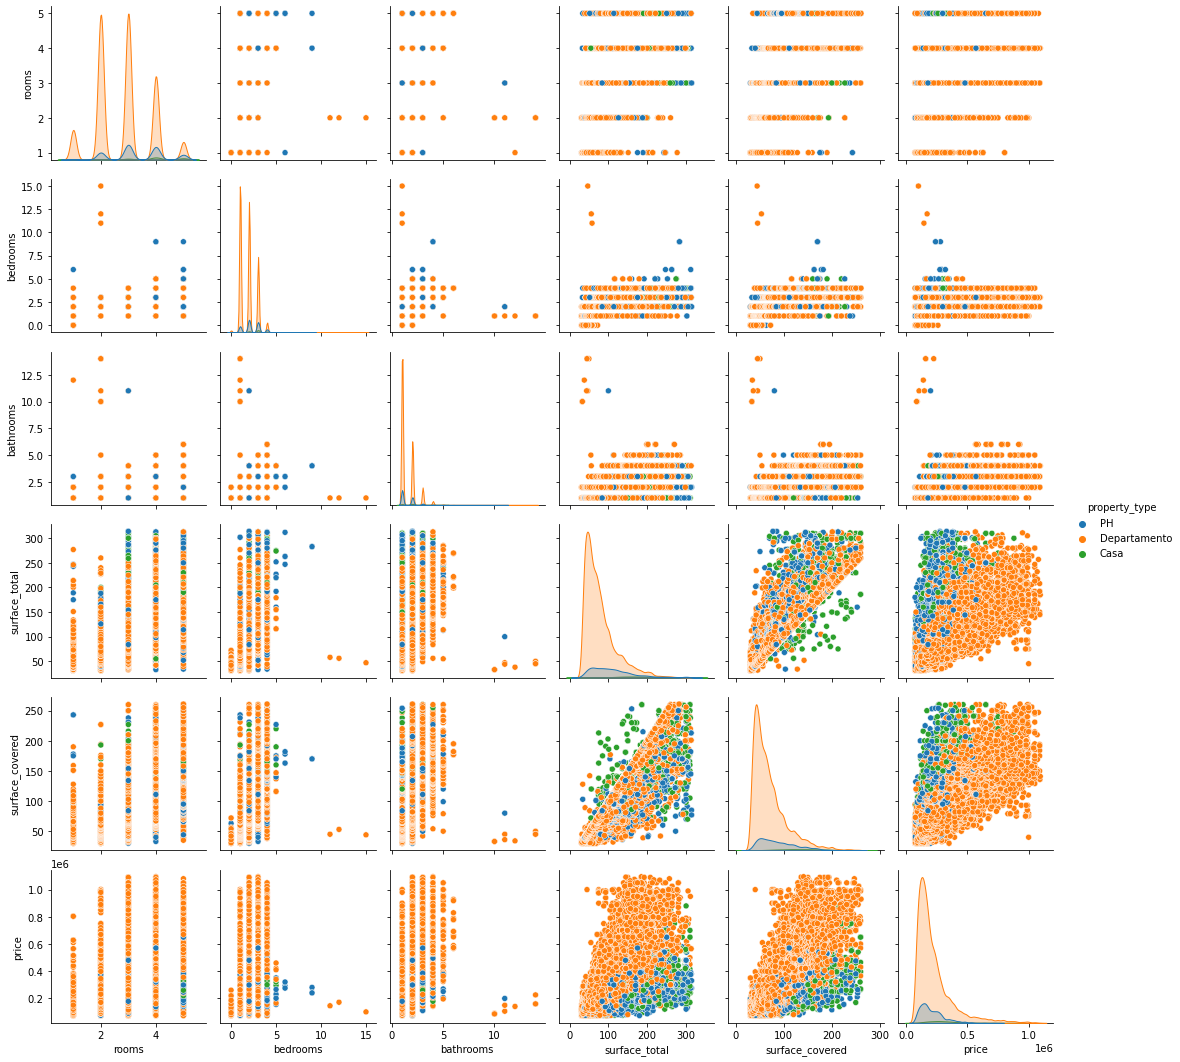

In [222]:
sns.pairplot(data=data_KNN, hue='property_type')

In [104]:
data_KNN_dummies = pd.get_dummies(data_KNN, drop_first=True)

In [105]:
data_KNN_dummies.shape

(72692, 64)

In [106]:
X=data_KNN_dummies.drop(columns=['price'])
y=data_KNN_dummies['price']

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)

In [109]:
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
scores=[]
for i in range(1,20):
    tree = DecisionTreeRegressor(max_depth=i)
    tree_scores = cross_val_score(tree, X_test_scaled, y_test, scoring='r2', cv=5)
    scores.append(tree_scores.mean())
    i+=1

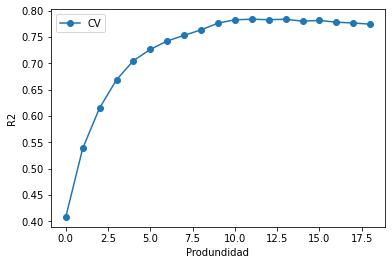

In [111]:
plt.plot(scores,'o-',label='CV')
plt.legend()
plt.xlabel('Produndidad')
plt.ylabel('R2')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [112]:
max(scores)

0.7838904291871972

Curvas de Validación

**Sin validación cruzada**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,shuffle=False,random_state=1)
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)

scores_train = []
scores_test = []

for max_depth in range(1,50):
    tree1 = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree1.fit(X_train_scaled, y_train)
    
    y_pred_train = tree1.predict(X_train_scaled)
    y_pred_test = tree1.predict(X_test_scaled)
    
    scores_train.append(r2_score(y_train, y_pred_train))
    scores_test.append(r2_score(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

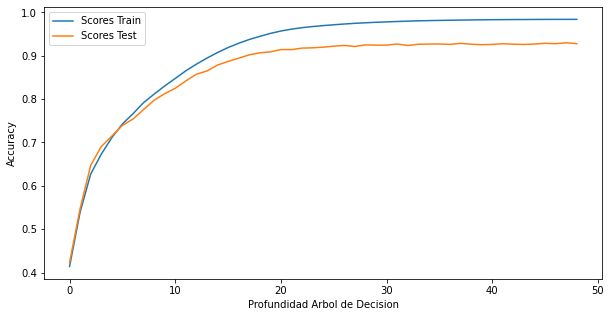

In [114]:
plt.figure(figsize=(10,5))
plt.plot(scores_train, label = 'Scores Train')
plt.plot(scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

**Con validación Cruzada**

In [115]:
from sklearn.model_selection import cross_validate
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    tree2 = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(tree2, X, y, cv=5,scoring='r2', return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

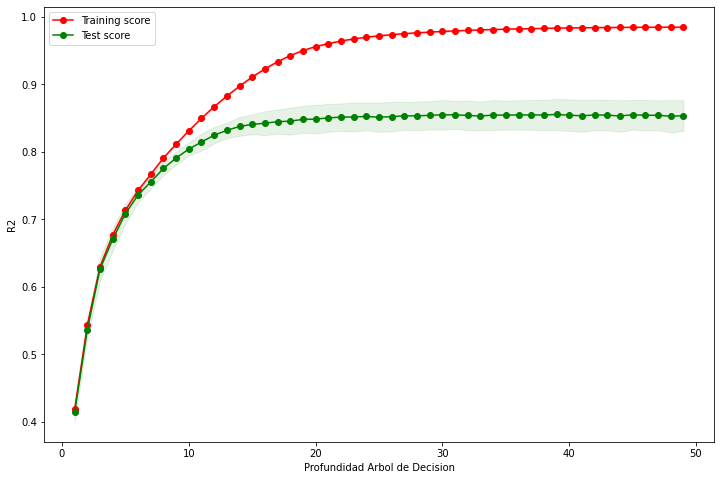

In [116]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('R2')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [117]:
max(tree_test_scores_mean)

0.8555249678330485

**Optimización de Hiper Parámetros**

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

Hacer Normalizacion

In [119]:
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [120]:
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV

In [121]:
param_grid_tree = {'criterion':['mse','friedman_mse', 'mae'],
                   'max_depth' :sp.stats.randint(1, 15),
              'min_samples_split':sp.stats.randint(2, 5),
              'min_samples_leaf':sp.stats.randint(1,4)}

In [122]:
model = RandomizedSearchCV(tree1, param_grid_tree,n_iter=10, random_state=0, scoring='r2',cv=5)

In [123]:
model.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=49,
                                                   random_state=42),
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E280365790>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E2802E3310>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E280464F10>},
                   random_state=0, scoring='r2')

In [124]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'mse', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 4}
Mejor Score: 0.8182810986602836



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.38339       0.06035          0.00666         0.00119   
1        0.21030       0.00352          0.00504         0.00040   
2        0.43492       0.02270          0.00605         0.00064   
3        0.38190       0.03395          0.00602         0.00014   
4        0.34884       0.02037          0.00541         0.00015   
5        0.44889       0.01354          0.00578         0.00027   
6        0.10256       0.00121          0.00516         0.00024   
7        0.25935       0.00247          0.00535         0.00051   
8        0.15910       0.00082          0.00514         0.00013   
9        0.49503       0.04442          0.00613         0.00070   

  param_criterion param_max_depth param_min_samples_leaf  \
0             mse               6                      1   
1    friedman_mse               3                      1   
2             mse               9                      1   
3    friedman_mse               7                      3   
4    friedman_mse               6                      2   
5             mse              10                      1   
6    friedman_mse               1                      3   
7    friedman_mse               4                      2   
8             mse               2                      2   
9             mse              11                      1   

  param_min_samples_split                                             params  \
0                       3  {'criterion': 'mse', 'max_depth': 6, 'min_samp...   
1                       4  {'criterion': 'friedman_mse', 'max_depth': 3, ...   
2                       4  {'criterion': 'mse', 'max_depth': 9, 'min_samp...   
3                       2  {'criterion': 'friedman_mse', 'max_depth': 7, ...   
4                       3  {'criterion': 'friedman_mse', 'max_depth': 6, ...   
5                       2  {'criterion': 'mse', 'max_depth': 10, 'min_sam...   
6                       2  {'criterion': 'friedman_mse', 'max_depth': 1, ...   
7                       4  {'criterion': 'friedman_mse', 'max_depth': 4, ...   
8                       3  {'criterion': 'mse', 'max_depth': 2, 'min_samp...   
9                       4  {'criterion': 'mse', 'max_depth': 11, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0            0.74248            0.73534            0.72878            0.75000   
1            0.63207            0.63273            0.60733            0.64373   
2            0.80349            0.79220            0.78910            0.80277   
3            0.76980            0.75419            0.75040            0.77182   
4            0.74248            0.73532            0.72878            0.75002   
5            0.81103            0.80799            0.80379            0.81680   
6            0.41636            0.42160            0.40793            0.42821   
7            0.67504            0.67341            0.65626            0.69029   
8            0.54060            0.54210            0.53177            0.54885   
9            0.81998            0.82087            0.81409            0.82815   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.73187          0.73769         0.00766                5  
1            0.62226          0.62762         0.01221                8  
2            0.78316          0.79414         0.00790                3  
3            0.75160          0.75956         0.00929                4  
4            0.73187          0.73769         0.00767                6  
5            0.79861          0.80765         0.00620                2  
6            0.41507          0.41783         0.00678               10  
7            0.66598          0.67220         0.01122                7  
8            0.53821          0.54031         0.00554                9  
9            0.80832          0.81828         0.00669                1

In [127]:
prediction = model.predict(X_test_scaled)
prediction2 = model.predict(X_train_scaled)
score_1=r2_score(y_test,prediction)
score_12=r2_score(y_train,prediction2)
test_r2_ajust_arbol = 1-(1-score_1)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print(score_12,score_1,test_r2_ajust_arbol)

0.8477582146949827 0.8156063350091451 0.813994233858101


**Regularización**

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

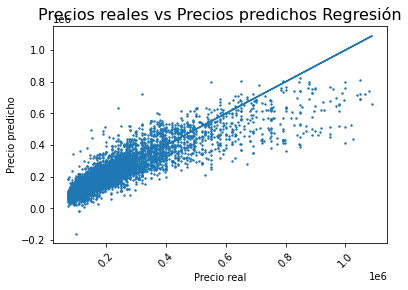

In [129]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.10)
linear_model = LinearRegression()

X_reg=data_KNN_dummies.drop(columns=['price'])
y_reg=data_KNN_dummies['price']

tree_scores = cross_val_score(linear_model , X_reg, y_reg, scoring='r2', cv=5)

linear_model.fit(X_train_reg, y_train_reg)

y_train_pred_reg = linear_model.predict(X_train_reg)
y_test_pred_reg = linear_model.predict(X_test_reg)

train_r2_reg = r2_score(y_train_reg,y_train_pred_reg)
train_r2_ajust_reg = 1-(1-train_r2_reg)*(len(y_train_reg)-1)/(len(y_train_reg)-X_reg.shape[1]-1)
    
test_r2_reg = r2_score(y_test_reg,y_test_pred_reg)
test_r2_ajust_reg = 1-(1-test_r2_reg)*(len(y_test_reg)-1)/(len(y_test_reg)-X_reg.shape[1]-1)

rmse_train_reg = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_reg))
rmse_test_reg = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg))

#print(f'R2 ajustado en Train: {round(train_r2_ajust_bench,4)}')
#print(f'R2 ajustado en Test: {round(test_r2_ajust_bench,4)}')
#print(f'Raíz del error cuadrático medio en Train: {round(rmse_train_bench)}')
#print(f'Raíz del error cuadrático medio en Test: {round(rmse_test_bench)}')

plt.scatter(y_test_reg,y_test_pred_reg, s =2)
plt.plot(y_test_reg,y_test_reg)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precios reales vs Precios predichos Regresión",fontsize=16)
plt.xticks(rotation=45)

In [130]:
print(test_r2_reg,test_r2_ajust_reg)

0.7690862111139775 0.7670673978056484


In [131]:
from sklearn.preprocessing import PolynomialFeatures

In [145]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree = 2, include_bias=False) ### ACA TENDRAS QUE MODIFICAR MAS ADELANTE
X_train_new1 = poly.fit_transform(X_train_reg)
X_test_new1 = poly.fit_transform(X_test_reg)

reg_2 = LinearRegression()
reg_2.fit(X_train_new1, y_train_reg)

y_train_pred_reg_2 = reg_2.predict(X_train_new1)
y_test_pred_reg_2 = reg_2.predict(X_test_new1)

Train_score1=r2_score(y_train_reg,y_train_pred_reg_2)
Test_score1=r2_score(y_test_reg,y_test_pred_reg_2)

test_score1_r2_ajust_reg = 1-(1-Test_score1)*(len(y_test_reg)-1)/(len(y_test_reg)-X_reg.shape[1]-1)

print(Train_score1,Test_score1,test_score1_r2_ajust_reg)

0.8283862600270087 0.8198535194291651 0.8182785501985291


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

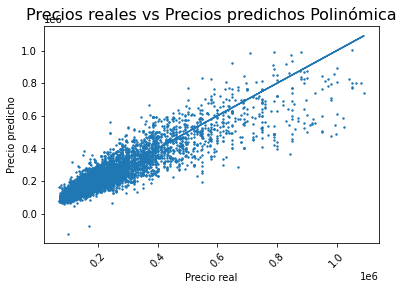

In [133]:
plt.scatter(y_test_reg,y_test_pred_reg_2, s =2)
plt.plot(y_test_reg,y_test_reg)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precios reales vs Precios predichos Polinómica",fontsize=16)
plt.xticks(rotation=45)

In [134]:
from sklearn.linear_model import Ridge, Lasso
reg_lasso = Lasso(alpha = 0.01)
reg_lasso.fit(X_train_new1,y_train_reg)
y_train_pred_reg4 = reg_lasso.predict(X_train_new1)
y_test_pred_reg4 = reg_lasso.predict(X_test_new1)

print(reg_lasso.coef_, reg_lasso.intercept_)

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119317686657484.62, tolerance: 138955198882.73276
  model = cd_fast.enet_coordinate_descent(


[ 32715.5626953   12003.74796     38963.14296256 ... -28075.24095015
      0.          23712.92897685] -89941.30240203


In [135]:
Train_score2=r2_score(y_train_reg,y_train_pred_reg4)
Test_score2=r2_score(y_test_reg,y_test_pred_reg4)

test_score2_r2_ajust_reg = 1-(1-Test_score2)*(len(y_test_reg)-1)/(len(y_test_reg)-X_reg.shape[1]-1)


print(Train_score2,Test_score2,test_score2_r2_ajust_reg)

0.8282775230008695 0.8201131265728684 0.8185404270133473


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

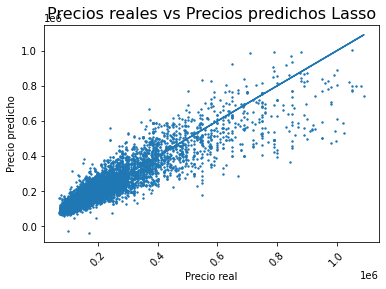

In [136]:
plt.scatter(y_test_reg,y_test_pred_reg4, s =2)
plt.plot(y_test_reg,y_test_reg)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precios reales vs Precios predichos Lasso",fontsize=16)
plt.xticks(rotation=45)

In [137]:
reg_ridge = Ridge(alpha= 0.001)
reg_ridge.fit(X_train_new1,y_train_reg)

y_train_pred_3 = reg_ridge.predict(X_train_new1)
y_test_pred_3 = reg_ridge.predict(X_test_new1)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83007e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Pendientes: [ 15650.99761125  47122.00344777  34053.71332979 ... -76461.49278209
      0.         -66460.4905684 ]
Ordenada: 70724.17821727763


In [138]:
Train_score3=r2_score(y_train_reg,y_train_pred_3)
Test_score3=r2_score(y_test_reg,y_test_pred_3)

test_score3_r2_ajust_reg = 1-(1-Test_score3)*(len(y_test_reg)-1)/(len(y_test_reg)-X_reg.shape[1]-1)

print(Train_score3,Test_score3,test_score3_r2_ajust_reg )

0.8283861565869205 0.8198642995765054 0.818289424593619


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

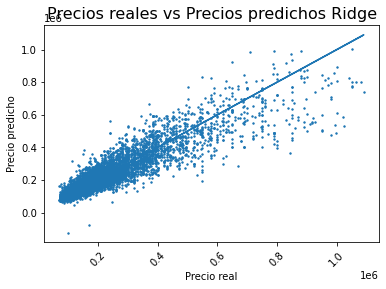

In [139]:
plt.scatter(y_test_reg,y_test_pred_3, s =2)
plt.plot(y_test_reg,y_test_reg)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precios reales vs Precios predichos Ridge",fontsize=16)
plt.xticks(rotation=45)

In [140]:
dicc={"R2_Train":[score_12,train_r2_reg,Train_score1,Train_score2,Train_score3,],"R2_Test":[score_1,test_r2_reg,Test_score1,Test_score2,Test_score3],"R2_Test_Ajus":[test_r2_ajust_arbol,test_r2_ajust_reg,test_score1_r2_ajust_reg,test_score2_r2_ajust_reg,test_score3_r2_ajust_reg],"Modelos":["Arbol de Desición","Regresión","Polinomio:Grado 2","Lasso","Ridge"]}

In [141]:
resultados1=pd.DataFrame(dicc)
resultados1

R2_Train  R2_Test  R2_Test_Ajus            Modelos
0   0.84776  0.81561       0.81399  Arbol de Desición
1   0.77089  0.76909       0.76707          Regresión
2   0.82839  0.81985       0.81828  Polinomio:Grado 2
3   0.82828  0.82011       0.81854              Lasso
4   0.82839  0.81986       0.81829              Ridge

**Comparativo de los distintos Modelos realizados**

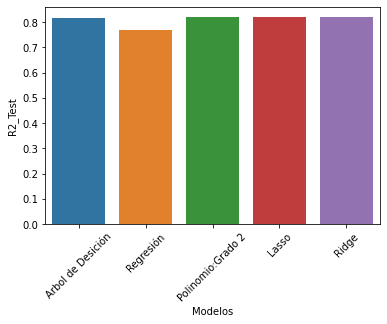

In [142]:
sns.barplot(data=resultados1,x="Modelos", y="R2_Test")
plt.xticks(rotation = 45)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

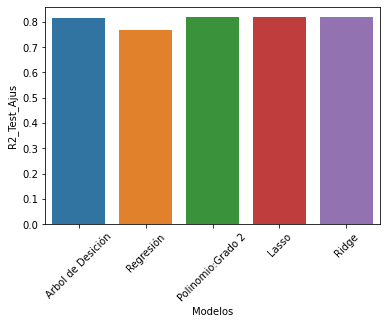

In [143]:
sns.barplot(data=resultados1,x="Modelos", y="R2_Test_Ajus")
plt.xticks(rotation = 45)

pd.set_option('display.float_format', lambda x: '%.5f' % x)